In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dosya Okuma

In [391]:
oasis = pd.read_csv("oasis.csv")

In [392]:
### Group -------> Demented, Non-demented veya Converted sınıfları
### Visit -------> Hastanın Ziyaret Sayısı
### MR Delay ----> Delay Magnetic Resonance(MR) gecikmesi, görüntü alımı yapılmadan önce verilen gecikme süresi
### M/F ---------> Hastanın Cinsiyeti
### Age ---------> Hastanın Tarama Sırasındaki Yaşı
### EDUC --------> Hastanın Eğitim Hayatı(yıl)
### SES ---------> Hastanın Sosyo Ekonomik Durumu (1-5)
### MMSE --------> Mini Mental Durum Testi Puanı
### CDR ---------> Klinik Demans Derecelendirmesi
### eTIV --------> Deneysel Toplam Kafa İçi Hacmi
### nWBV --------> Normalize Edilmiş Tüm Beyin Hacmi
### ASF ---------> Atlas Ölçeklendirme Faktörü

### Parametre olarak alınmayanlar;
### Subject ID --> Hastanın kimlik numarası
### MR ID -------> Her hastanın MR kimlik numarası
### Hand --------> Sağ el yada Sol el kullanma alışkanlığı (tüm örnekler Sağ el kullanmaktadır)

############### Mini Mental Durum Testi Puanı ###############
###  MMSE      Demans Skoru                               ###
### 25-30 --> Sağlıklı (Demans Değil)                     ###
### 21-24 --> Erken aşama Alzheimer (Very Mild Alzheimer) ###
### 10-20 --> Orta aşama Alzheimer (Mild Alzheimer)       ###
###  0-10 --> İleri aşama (Modarate Alzheimer)            ###
#############################################################

############## Klinik Demans Derecelendirmesi ###############
### CDR      Demans Skoru                                 ###
###  0  --> Sağlıklı (Demans Değil)                       ###
### 0,5 --> Erken aşama Alzheimer (Very Mild Alzheimer)   ###
###  1  --> Orta aşama Alzheimer (Mild Alzheimer)         ###
###  2  --> İleri aşama (Modarate Alzheimer)              ###
###  3  --> Şiddetli (Son) aşama (Severe Alzheimer)       ###
#############################################################

In [393]:
print(oasis)

    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  

In [394]:
oasis

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


# Veri Analizi

In [395]:
# Analiz
oasis.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [396]:
# Veri Farklılıkları
# Ne kadar farklı değer var

for i in list(oasis.columns):
    print(f"{i} -> {oasis[i].value_counts().shape[0]}")

Subject ID -> 150
MRI ID -> 373
Group -> 3
Visit -> 5
MR Delay -> 201
M/F -> 2
Hand -> 1
Age -> 39
EDUC -> 12
SES -> 5
MMSE -> 18
CDR -> 4
eTIV -> 286
nWBV -> 136
ASF -> 265


In [397]:
# Null Değerler
# Ne kadar null değer var
oasis.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

## Null işlemler

In [398]:
# Veri setinin ilk 15 değerini yaz
oasis.head(15)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [399]:
# Null kayıtları dropla ve ilk 15 değerini yaz
oasis.dropna().head(15)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380
14,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,F,R,95,14,2.0,29.0,0.0,1257,0.703,1.396
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [400]:
# Ne kadar null değer var?
# SES ve MMSE de null değerler varmış
oasis.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [401]:
# SES ve MMSE sütunlarındaki eksik (NaN) Null değerleri, her bir sütunun ortalaması ile doldur
oasis_filled = oasis.fillna({
    "SES": oasis["SES"].mean(),    # SES sütunu için ortalama değerle doldur
    "MMSE": oasis["MMSE"].mean()   # MMSE sütunu için ortalama değerle doldur
})

In [402]:
oasis

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [403]:
# Güncellenmiş (eksikleri doldurulmuş) veriyi "oasisUpdateNull.csv" adlı yeni bir dosyaya kaydet
# index=False yazarak DataFrame'in satır numaralarının (index) dosyaya yazılmasını engelliyoruz
oasis_filled.to_csv("oasisUpdateNull.csv", index=False)

# Artık eksik verileri doldurulmuş olan CSV dosyasını yeniden okuyoruz ve oasis değişkenine atıyoruz
# Bu sayede sonraki işlemlerimizi temiz veri üzerinden gerçekleştirebiliriz
oasis = pd.read_csv("oasisUpdateNull.csv")
print("\n✅ Null değerler işlemi tamamlandı. Güncellenmiş veri 'oasisUpdateNull.csv' dosyasına kaydedildi.")


✅ Null değerler işlemi tamamlandı. Güncellenmiş veri 'oasisUpdateNull.csv' dosyasına kaydedildi.


In [404]:
oasis

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [405]:
# Ne kadar null değer var? Kontrol edelim
# Null değer 
oasis.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

## Aykırı Değerler

In [406]:
# Veri tiplerini kontrol et
print(oasis.dtypes)

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object


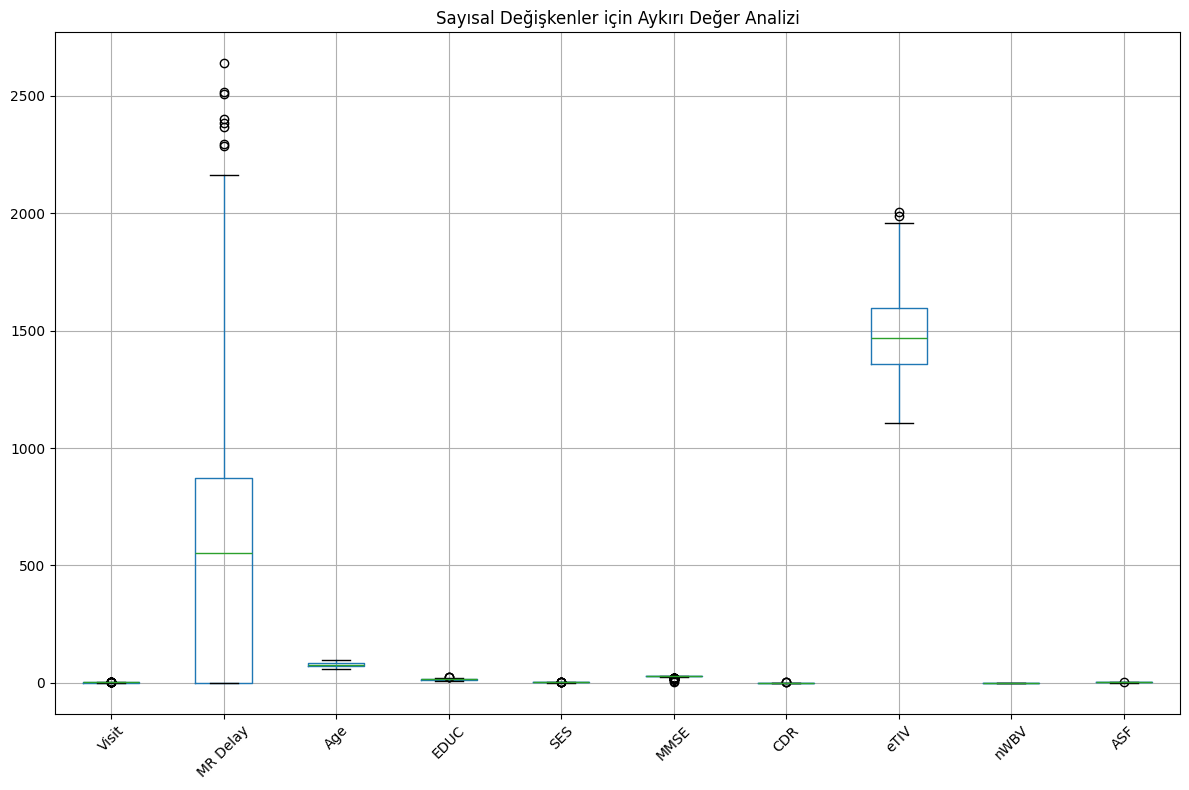

In [407]:
# Sayısal sütunları seç
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# Sayısal sütunlar için kutu grafiği oluşturma
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Sayısal Değişkenler için Aykırı Değer Analizi")
plt.tight_layout()
plt.show()

In [409]:
# Temizlenmiş (null değeri olmayan) veriyi oku
oasis = pd.read_csv("oasisUpdateNull.csv")

# Sayısal sütunları seç
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# Her sayısal sütun için aykırı değer kontrolü ve düzeltme işlemi
for col in numeric_columns:
    # 1. ve 3. çeyrekleri hesapla
    Q1 = oasis[col].quantile(0.25)
    Q3 = oasis[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Alt ve üst sınırları belirle
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Aykırı değerleri bul (sınırların dışında kalanlar)
    outliers = oasis[(oasis[col] < lower_limit) | (oasis[col] > upper_limit)][col]

    # Eğer aykırı değer varsa, bilgi yazdır
    if len(outliers) > 0:
        print(f"\n📊 {col} sütunundaki aykırı değerler:")
        print(f"   - Alt sınır: {lower_limit:.2f}")
        print(f"   - Üst sınır: {upper_limit:.2f}")
        print(f"   - Aykırı değer sayısı: {len(outliers)}")
        print(f"   - İlk 5 aykırı değer:")
        print(outliers.head())

    # Aykırı değerleri alt/üst sınırlarla değiştir
    oasis[col] = oasis[col].apply(
        lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x)
    )

# Aykırı değerleri düzeltilmiş veriyi yeni dosyaya kaydet
oasis.to_csv("oasisUpdateAykiri.csv", index=False)

# Güncellenmiş veriyi tekrar oku
oasis = pd.read_csv("oasisUpdateAykiri.csv")

print("\n✅ Aykırı değer işlemi tamamlandı. Güncellenmiş veri 'oasisUpdateAykiri.csv' dosyasına kaydedildi.")


📊 Visit sütunundaki aykırı değerler:
   - Alt sınır: -0.50
   - Üst sınır: 3.50
   - Aykırı değer sayısı: 21
   - İlk 5 aykırı değer:
12    4
31    4
32    5
35    4
50    4
Name: Visit, dtype: int64

📊 MR Delay sütunundaki aykırı değerler:
   - Alt sınır: -1309.50
   - Üst sınır: 2182.50
   - Aykırı değer sayısı: 8
   - İlk 5 aykırı değer:
32     2400
71     2369
75     2508
153    2386
159    2288
Name: MR Delay, dtype: int64

📊 EDUC sütunundaki aykırı değerler:
   - Alt sınır: 6.00
   - Üst sınır: 22.00
   - Aykırı değer sayısı: 3
   - İlk 5 aykırı değer:
107    23
108    23
109    23
Name: EDUC, dtype: int64

📊 SES sütunundaki aykırı değerler:
   - Alt sınır: 0.50
   - Üst sınır: 4.50
   - Aykırı değer sayısı: 7
   - İlk 5 aykırı değer:
136    5.0
137    5.0
138    5.0
161    5.0
162    5.0
Name: SES, dtype: float64

📊 MMSE sütunundaki aykırı değerler:
   - Alt sınır: 22.50
   - Üst sınır: 34.50
   - Aykırı değer sayısı: 42
   - İlk 5 aykırı değer:
4     22.0
25    21.0
26    16.0

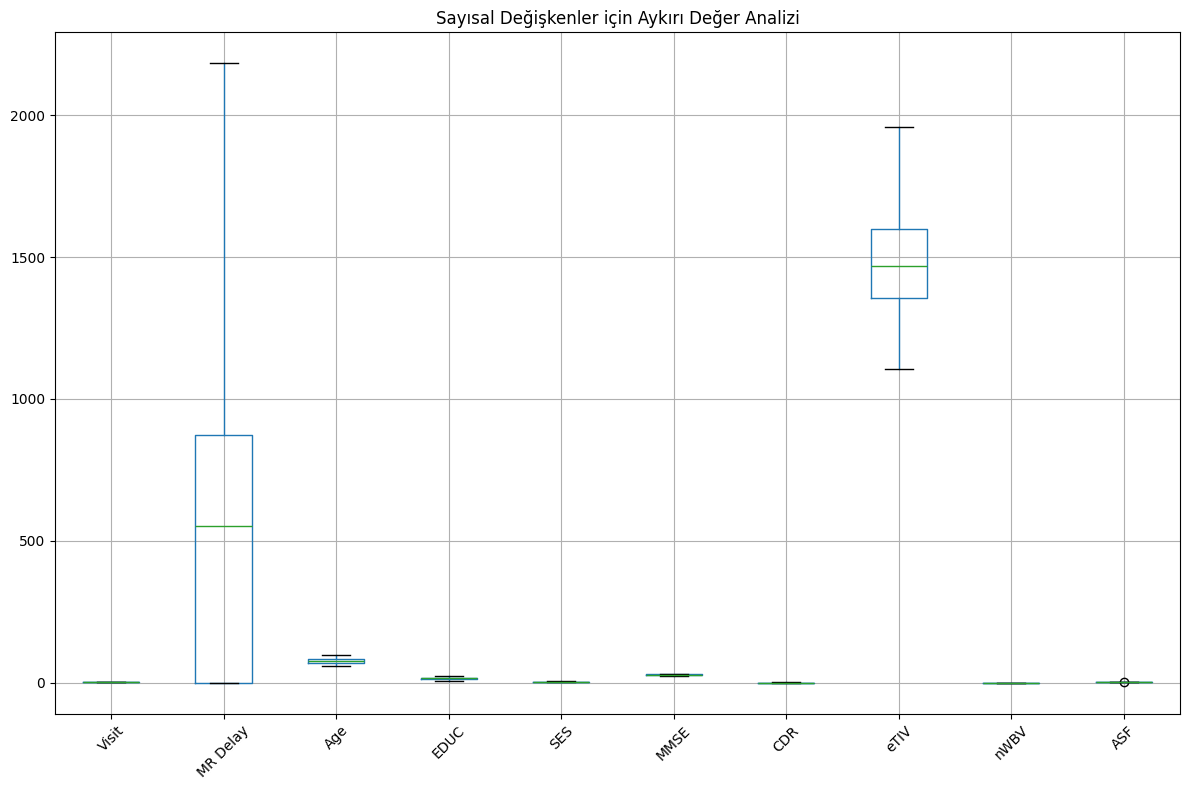


✅Güncellenmiş veri seti:
  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented    1.0       0.0   M    R   87  14.0   
1  OAS2_0001  OAS2_0001_MR2  Nondemented    2.0     457.0   M    R   88  14.0   
2  OAS2_0002  OAS2_0002_MR1     Demented    1.0       0.0   M    R   75  12.0   
3  OAS2_0002  OAS2_0002_MR2     Demented    2.0     560.0   M    R   76  12.0   
4  OAS2_0002  OAS2_0002_MR3     Demented    3.0    1895.0   M    R   80  12.0   

        SES  MMSE  CDR    eTIV   nWBV    ASF  
0  2.000000  27.0  0.0  1957.0  0.696  0.883  
1  2.000000  30.0  0.0  1957.0  0.681  0.876  
2  2.460452  23.0  0.5  1678.0  0.736  1.046  
3  2.460452  28.0  0.5  1738.0  0.713  1.010  
4  2.460452  22.5  0.5  1698.0  0.701  1.034  


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1.0,0.0,M,R,87,14.0,2.000000,27.0,0.0,1957.0,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2.0,457.0,M,R,88,14.0,2.000000,30.0,0.0,1957.0,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1.0,0.0,M,R,75,12.0,2.460452,23.0,0.5,1678.0,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2.0,560.0,M,R,76,12.0,2.460452,28.0,0.5,1738.0,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3.0,1895.0,M,R,80,12.0,2.460452,22.5,0.5,1698.0,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2.0,842.0,M,R,82,16.0,1.000000,28.0,0.5,1693.0,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3.0,2182.5,M,R,86,16.0,1.000000,26.0,0.5,1688.0,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1.0,0.0,F,R,61,13.0,2.000000,30.0,0.0,1319.0,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2.0,763.0,F,R,63,13.0,2.000000,30.0,0.0,1327.0,0.796,1.323


In [410]:
# Sayısal sütunları seç
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# Sayısal sütunlar için kutu grafiği oluşturma
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Sayısal Değişkenler için Aykırı Değer Analizi")
plt.tight_layout()
plt.show()

print("\n✅Güncellenmiş veri seti:") # (Aykırı değerler giderildi)
print(oasis.head())
oasis

## Veri Görselleştirme

Text(0.5, 1.0, 'Gurup dağılımı')

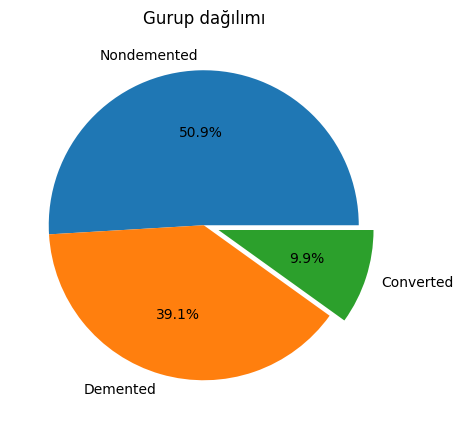

In [411]:
director_count = oasis["Group"].str.split(expand=True).stack().value_counts()
explode = [0,0,0.1]

plt.figure(figsize=(5,8))
plt.pie(director_count, labels=director_count.index, autopct="%1.1f%%", explode = explode)

plt.title("Gurup dağılımı") # Çok büyük veri dengesizliği!

### Histogram tabloları

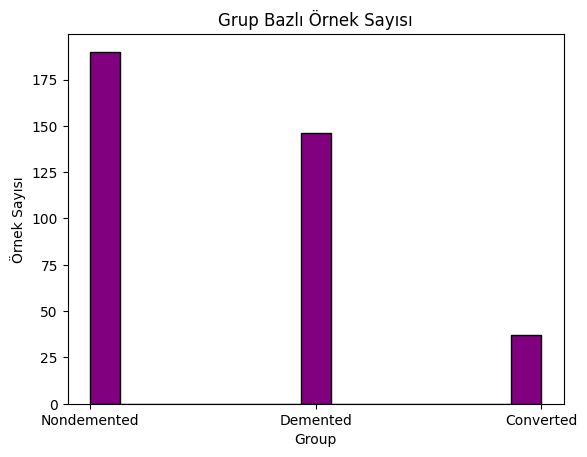

In [412]:
plt.hist(oasis["Group"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("Group")
plt.ylabel("Örnek Sayısı")
plt.title( "Grup Bazlı Örnek Sayısı")
plt.show()

# plt.xticks(rotation = 0)
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

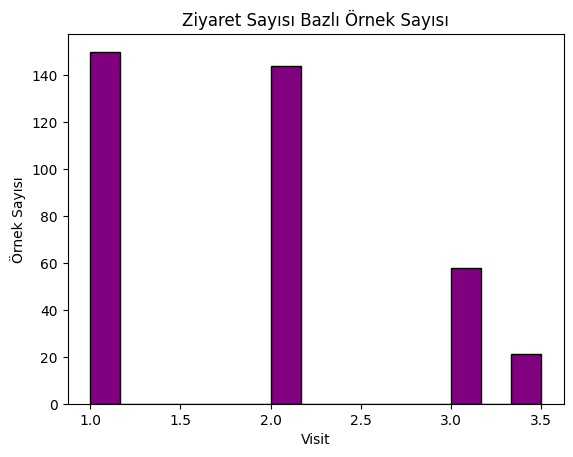

In [413]:
plt.hist(oasis["Visit"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("Visit")
plt.ylabel("Örnek Sayısı")
plt.title( "Ziyaret Sayısı Bazlı Örnek Sayısı")
plt.show()

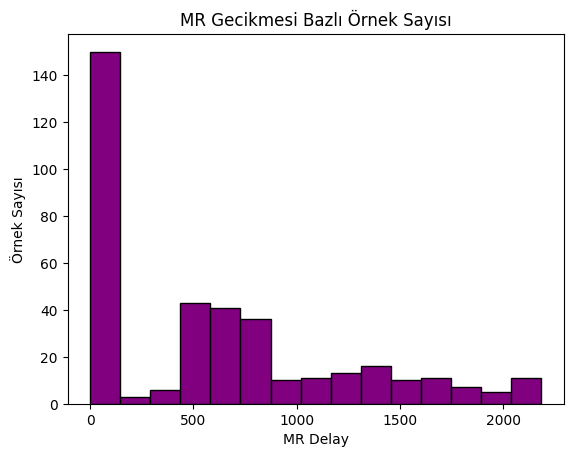

In [414]:
plt.hist(oasis["MR Delay"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("MR Delay")
plt.ylabel("Örnek Sayısı")
plt.title( "MR Gecikmesi Bazlı Örnek Sayısı")
plt.show()

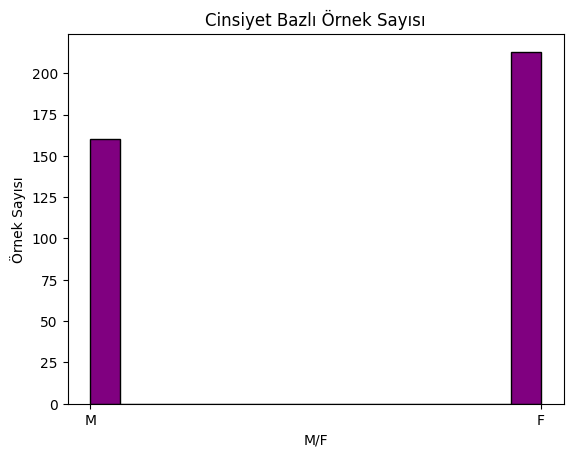

In [415]:
plt.hist(oasis["M/F"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("M/F")
plt.ylabel("Örnek Sayısı")
plt.title( "Cinsiyet Bazlı Örnek Sayısı")
plt.show()
# M/F hâlâ sayısal veri değil M ve F şeklinde

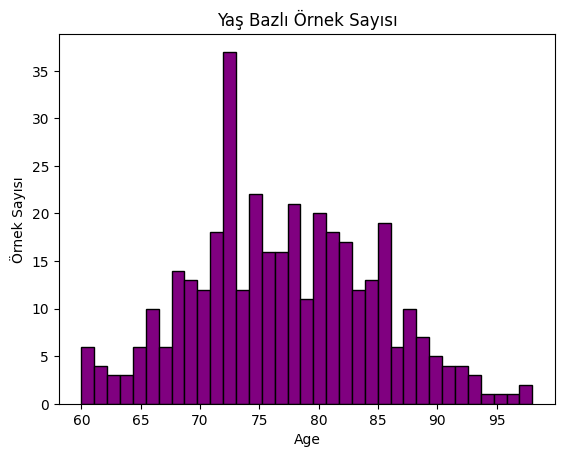

In [416]:
plt.hist(oasis["Age"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("Age")
plt.ylabel("Örnek Sayısı")
plt.title( "Yaş Bazlı Örnek Sayısı")
plt.show()

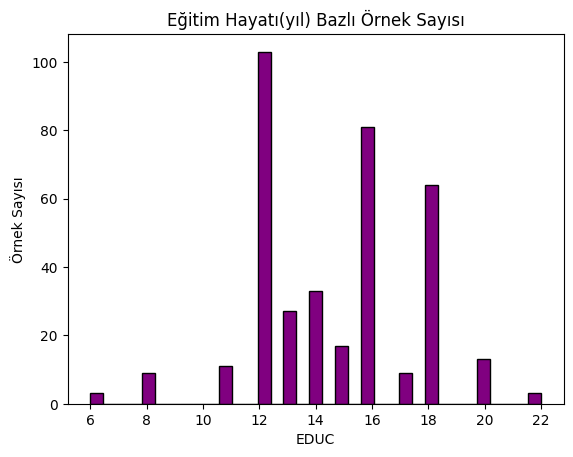

In [417]:
plt.hist(oasis["EDUC"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("EDUC")
plt.ylabel("Örnek Sayısı")
plt.title( "Eğitim Hayatı(yıl) Bazlı Örnek Sayısı")
plt.show()

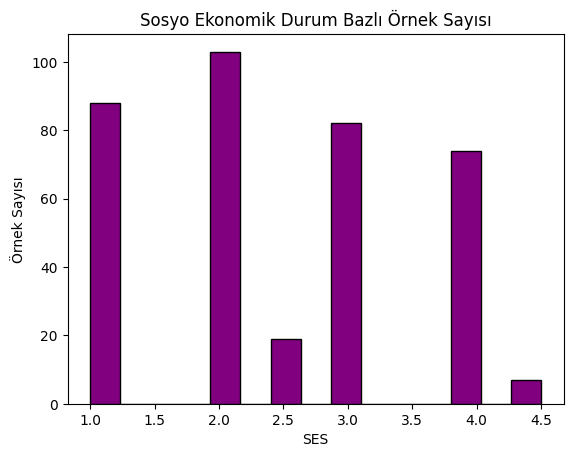

In [418]:
plt.hist(oasis["SES"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("SES")
plt.ylabel("Örnek Sayısı")
plt.title( "Sosyo Ekonomik Durum Bazlı Örnek Sayısı")
plt.show()

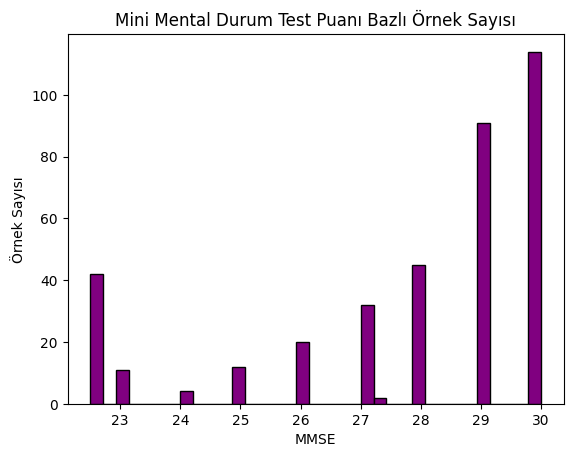

In [419]:
plt.hist(oasis["MMSE"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("MMSE")
plt.ylabel("Örnek Sayısı")
plt.title( "Mini Mental Durum Test Puanı Bazlı Örnek Sayısı")
plt.show()

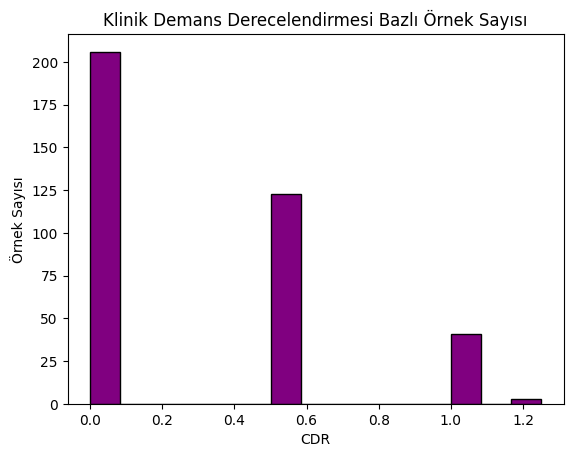

In [420]:
plt.hist(oasis["CDR"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("CDR")
plt.ylabel("Örnek Sayısı")
plt.title( "Klinik Demans Derecelendirmesi Bazlı Örnek Sayısı")
plt.show()

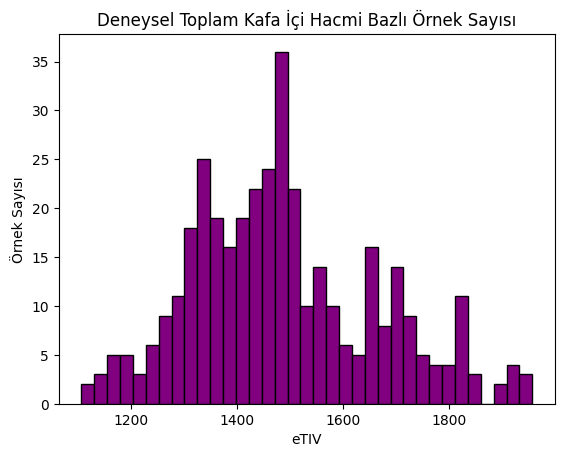

In [421]:
plt.hist(oasis["eTIV"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("eTIV")
plt.ylabel("Örnek Sayısı")
plt.title( "Deneysel Toplam Kafa İçi Hacmi Bazlı Örnek Sayısı")
plt.show()

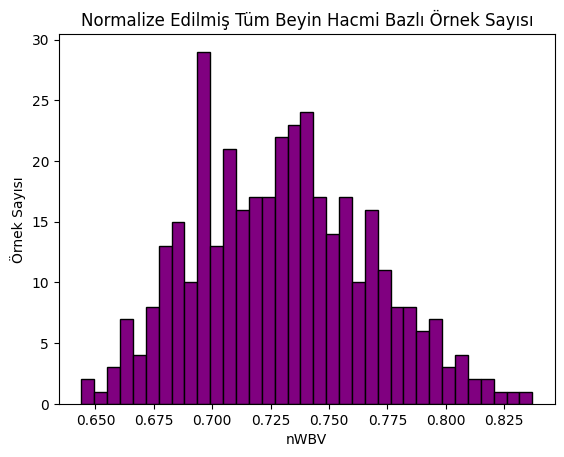

In [422]:
plt.hist(oasis["nWBV"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("nWBV")
plt.ylabel("Örnek Sayısı")
plt.title( "Normalize Edilmiş Tüm Beyin Hacmi Bazlı Örnek Sayısı")
plt.show()

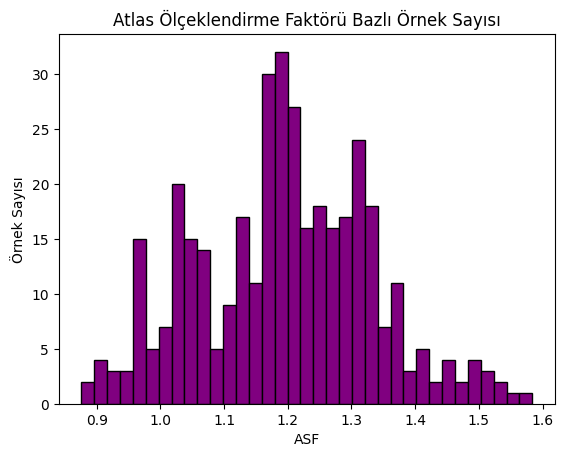

In [423]:
plt.hist(oasis["ASF"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("ASF")
plt.ylabel("Örnek Sayısı")
plt.title( "Atlas Ölçeklendirme Faktörü Bazlı Örnek Sayısı")
plt.show()

### Scatter Tablosu

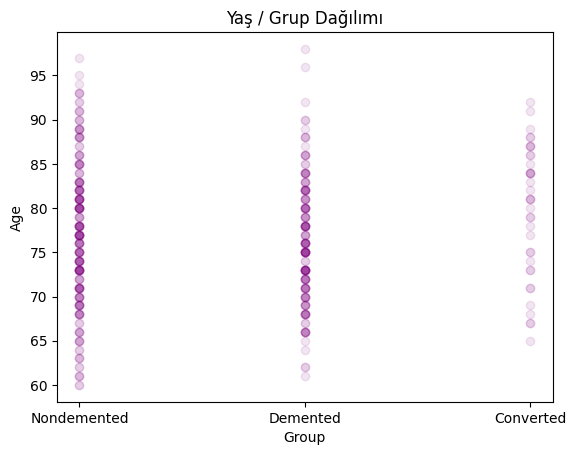

In [424]:
plt.scatter(oasis["Group"], oasis["Age"], color="purple", alpha= 0.1)
plt.title("Yaş / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('Age')
# plt.grid()
plt.show()

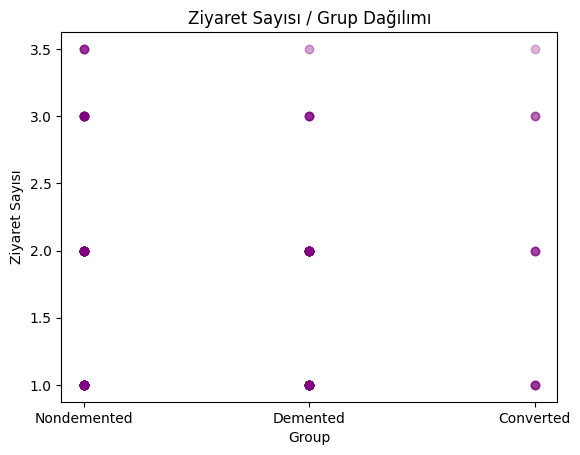

In [425]:
plt.scatter(oasis["Group"], oasis["Visit"], color="purple", alpha= 0.1)
plt.title("Ziyaret Sayısı / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('Ziyaret Sayısı')
plt.show()

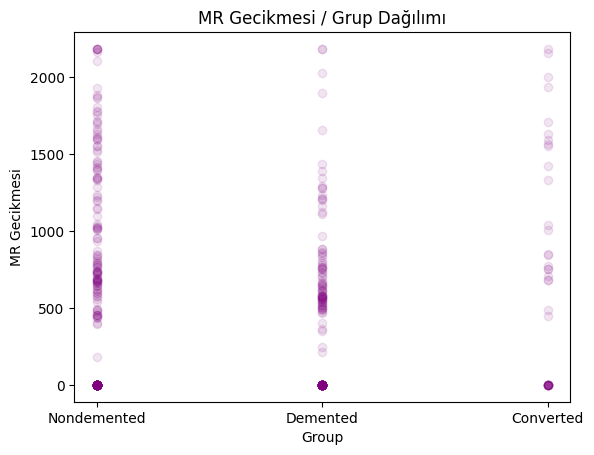

In [426]:
plt.scatter(oasis["Group"], oasis["MR Delay"], color="purple", alpha= 0.1)
plt.title("MR Gecikmesi / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('MR Gecikmesi')
plt.show()

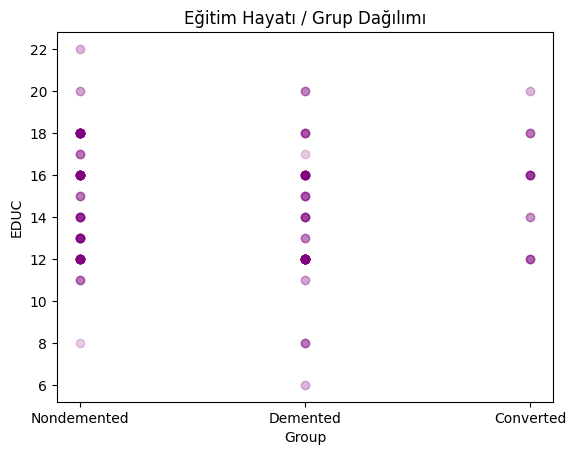

In [427]:
plt.scatter(oasis["Group"], oasis["EDUC"], color="purple", alpha= 0.1)
plt.title("Eğitim Hayatı / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('EDUC')
plt.show()

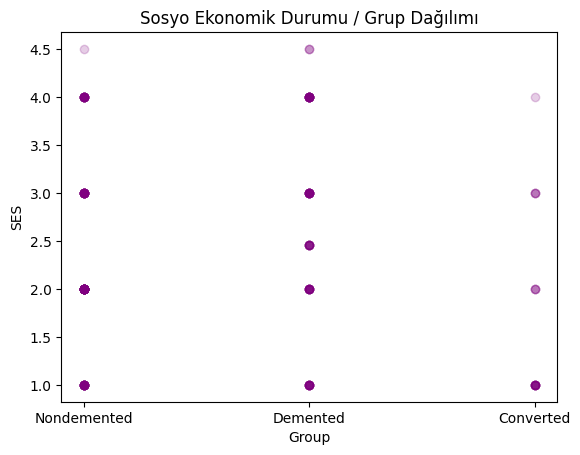

In [428]:
plt.scatter(oasis["Group"], oasis["SES"], color="purple", alpha= 0.1)
plt.title("Sosyo Ekonomik Durumu / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('SES')
plt.show()

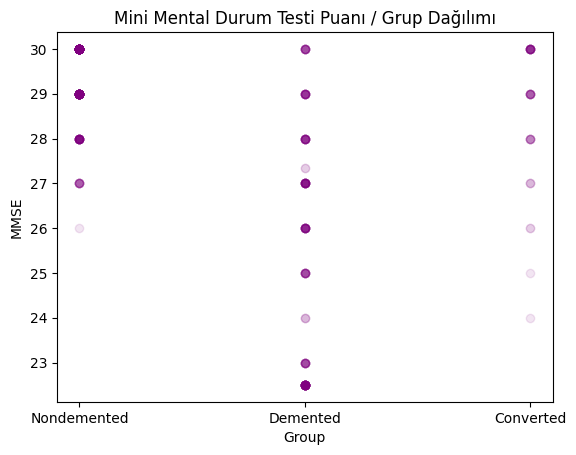

In [429]:
plt.scatter(oasis["Group"], oasis["MMSE"], color="purple", alpha= 0.1)
plt.title("Mini Mental Durum Testi Puanı / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('MMSE')
plt.show()

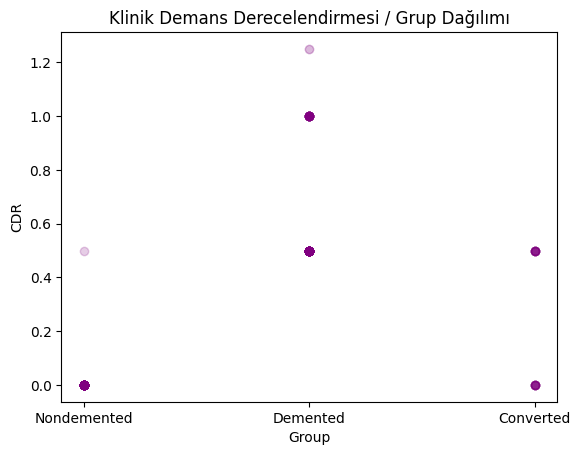

In [430]:
plt.scatter(oasis["Group"], oasis["CDR"], color="purple", alpha= 0.1)
plt.title("Klinik Demans Derecelendirmesi / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('CDR')
plt.show()

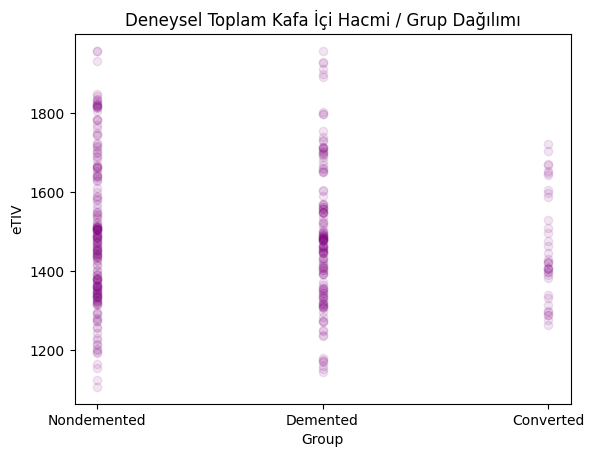

In [431]:
plt.scatter(oasis["Group"], oasis["eTIV"], color="purple", alpha= 0.1)
plt.title("Deneysel Toplam Kafa İçi Hacmi / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('eTIV')
plt.show()

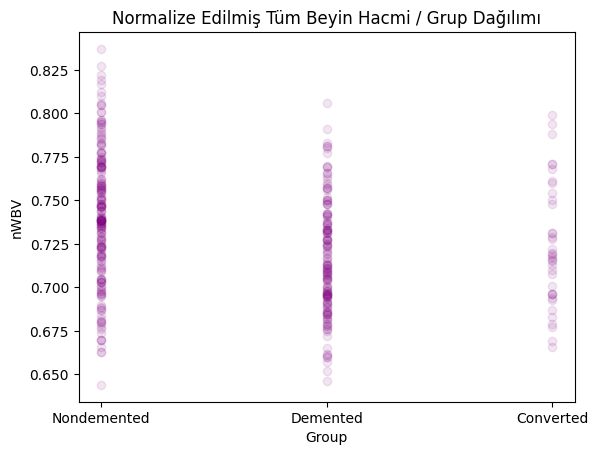

In [432]:
plt.scatter(oasis["Group"], oasis["nWBV"], color="purple", alpha= 0.1)
plt.title("Normalize Edilmiş Tüm Beyin Hacmi / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('nWBV')
plt.show()

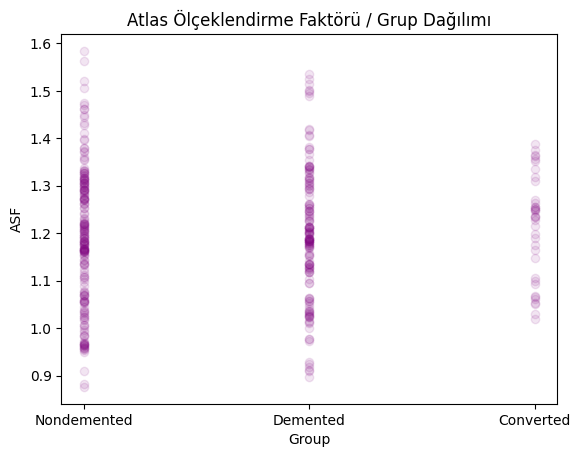

In [433]:
plt.scatter(oasis["Group"], oasis["ASF"], color="purple", alpha= 0.1)
plt.title("Atlas Ölçeklendirme Faktörü / Grup Dağılımı")
plt.xlabel('Group')
plt.ylabel('ASF')
plt.show()

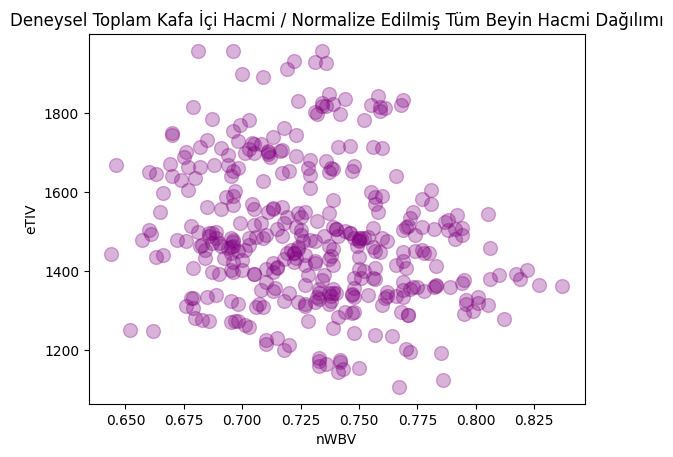

In [434]:
plt.scatter(oasis["nWBV"], oasis["eTIV"], color="purple", alpha= 0.3, s= 100)
plt.title("Deneysel Toplam Kafa İçi Hacmi / Normalize Edilmiş Tüm Beyin Hacmi Dağılımı")
plt.xlabel('nWBV')
plt.ylabel('eTIV')
plt.show()

# Makine Öğrenmesi

In [551]:
# Güncellenmiş veriyi makine öğrenmesine hazır olacak şekilde kaydet
oasis.to_csv("oasisUpdateMakine.csv", index=False)

# Makine öğrenmesinde kullanılacak veri setini yeniden oku
oasis = pd.read_csv("oasisUpdateMakine.csv")

In [552]:
oasis

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,2,1.0,0.0,1,0,87,14.0,2.000000,27.0,0.0,1957.0,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,2,2.0,457.0,1,0,88,14.0,2.000000,30.0,0.0,1957.0,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1.0,0.0,1,0,75,12.0,2.460452,23.0,0.5,1678.0,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2.0,560.0,1,0,76,12.0,2.460452,28.0,0.5,1738.0,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3.0,1895.0,1,0,80,12.0,2.460452,22.5,0.5,1698.0,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2.0,842.0,1,0,82,16.0,1.000000,28.0,0.5,1693.0,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,1,3.0,2182.5,1,0,86,16.0,1.000000,26.0,0.5,1688.0,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,2,1.0,0.0,0,0,61,13.0,2.000000,30.0,0.0,1319.0,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,2,2.0,763.0,0,0,63,13.0,2.000000,30.0,0.0,1327.0,0.796,1.323


In [553]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Güncellenmiş veriyi yükle
oasis = pd.read_csv("oasisUpdateMakine.csv")

# Kategorik sütunları sayısal verilere çevir (encoding)
le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])  # 0: Converted, 1: Demented, 2: Nondemented
oasis['M/F'] = le.fit_transform(oasis['M/F'])  # 0: F, 1: M
oasis['Hand'] = le.fit_transform(oasis['Hand'])  # (silsek de encode'lu olsun xd)

# Gerekli olmayan sütunları çıkar
# Subject ID ve MRI ID önemli olmadığından çıkarıldı. Hand hep değerleri aynı olduğundan çıkarıldı
# Geriye kalan sütunlar X(Bağımsız Değişkenler) değişkene atandı
# axis=1: Sütunları hedef aldığını belirtir (satırları kaldırmak için axis=0 kullanılır)
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)  # Bağımsız değişkenler (X)
y = oasis['Group']  # Hedef değişken (y)

In [554]:
# Veriyi eğitim (%80) ve test (%20) olarak ayır (test_size=0.2)
# X_train: Eğitim için kullanılacak bağımsız değişkenler.
# X_test : Test için kullanılacak bağımsız değişkenler.
# y_train: Eğitim için kullanılacak hedef değişken.
# y_test : Test için kullanılacak hedef değişken.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini oluşturma ve eğitme
# Model Oluşturma
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluşturulan karar ağacı
# Model Eğitme
rf_model.fit(X_train, y_train)

# Test verisi (X_test) ile tahmin yap
y_pred = rf_model.predict(X_test)

print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)

print("Toplam tahmin sayısı:", len(y_pred))
print(y_pred)

Eğitim verisi boyutu: (298, 10)
Test verisi boyutu: (75, 10)
Toplam tahmin sayısı: 75
[1 0 1 2 2 1 1 2 2 1 1 1 2 2 1 2 2 1 2 1 2 2 1 1 2 1 1 2 2 0 1 2 2 1 2 2 2
 2 2 1 2 2 1 0 2 1 1 2 2 1 1 2 1 2 1 2 1 1 2 1 2 2 1 1 0 1 2 2 1 2 1 1 2 2
 2]


In [555]:
# Model performansını yazdır

# Doğruluk Oranı, test verilerindeki (Doğru Tahmin Sayısı / Toplam Tahmin Sayısı)
print("Doğruluk Oranı (Accuracy):", accuracy_score(y_test, y_pred))


# Precision (Kesinlik): Tahmin edilen sınıfa ait örneklerin ne kadarının doğru olduğunu ölçer.
# Recall (Duyarlılık) : Gerçek sınıfa ait örneklerin ne kadarının doğru tahmin edildiğini ölçer.
# F1-Score            : Precision ve Recall'un harmonik ortalamasıdır.
print("\n Sınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# Sınıflandırma Raporu'nun yorumu
#   Sınıf 0 Converted:
#      Precision: 0.75 (Modelin "0" dediği örneklerin %75'i doğru)
#      Recall   : 0.27 (Gerçek "0" örneklerinin sadece %27'si doğru tahmin edilmiş)
#      F1-Score : 0.40 (Düşük performans)

#   Sınıf 1 Demented:
#      Precision: 0.94 (Modelin "1" dediği örneklerin %94'ü doğru)
#      Recall   : 0.97 (Gerçek "1" örneklerinin %97'si doğru tahmin edilmiş)
#      F1-Score : 0.95 (Çok iyi performans)

#   Sınıf 2 Nondemented:
#      Precision: 0.82 (Modelin "2" dediği örneklerin %82'si doğru)
#      Recall   : 0.97 (Gerçek "2" örneklerinin %97'si doğru tahmin edilmiş)
#      F1-Score : 0.89 (İyi performans)


# Bu matris, modelin tahminlerinin gerçek değerlerle nasıl uyuştuğunu gösterir.
# Satırlar: Gerçek sınıflar
# Sütunlar: Tahmin edilen sınıflar
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
# Karışıklık Matrisi'nin yorumu
# Gerçek Sınıf	  Tahmin Sınıf 0	  Tahmin Sınıf 1	  Tahmin Sınıf 2	  Toplam
#    0	            3 (doğru)	        1 (yanlış)	        7 (yanlış)	        11
#    1	            1 (yanlış)	       31 (doğru)	        0 (yanlış)	        32
#    2	            0 (yanlış)	        1 (yanlış)	       31 (doğru)	        32

#   Sınıf 0 Converted (11 örnek):
#      Model, sadece 3 tanesini doğru tahmin etmiş, 8'ini yanlış sınıflandırmış
#   Sınıf 1 Demented (32 örnek):
#      31 örneği doğru, sadece 1 tanesi yanlış
#   Sınıf 2 Nondemented (32 örnek):
#      31 örneği doğru, sadece 1 tanesi yanlış

Doğruluk Oranı (Accuracy): 0.8666666666666667

 Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75


Karışıklık Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]


Doğruluk Oranı (Accuracy): 0.8666666666666667


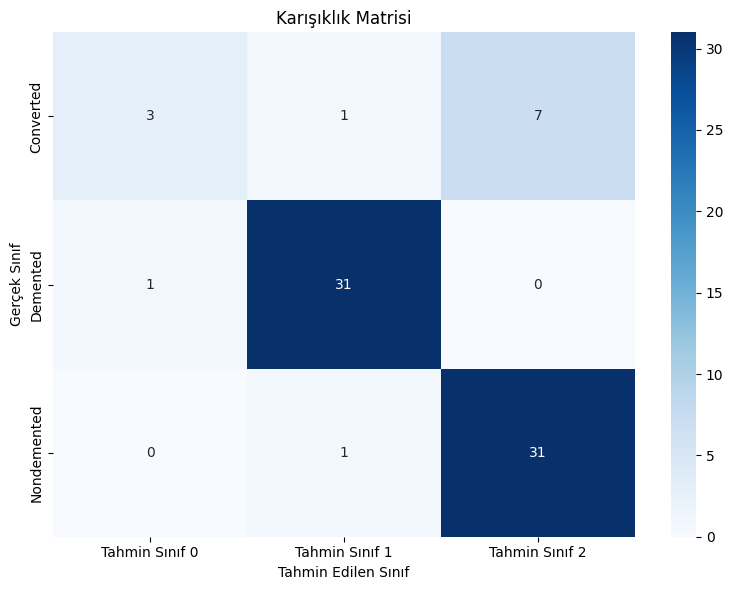

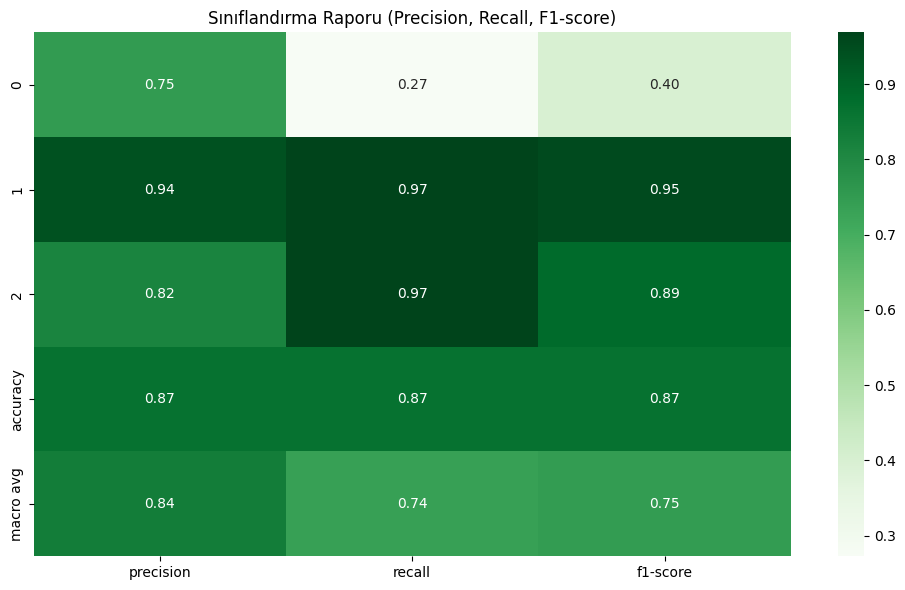

In [556]:
# Doğruluk Oranı
print("Doğruluk Oranı (Accuracy):", accuracy_score(y_test, y_pred))

# Karışıklık Matrisini görselleştir
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Tahmin Sınıf 0', 'Tahmin Sınıf 1', 'Tahmin Sınıf 2'], 
            yticklabels=['Converted', 'Demented', 'Nondemented'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.tight_layout()
plt.show()

# Sınıflandırma raporunu görselleştir

# Sınıflandırma Raporunu Al
report_dict = classification_report(y_test, y_pred, output_dict=True)
# Raporu DataFrame'e Dönüştür
report_df = pd.DataFrame(report_dict).transpose()

# Görselleştir
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu (Precision, Recall, F1-score)")
plt.tight_layout()
plt.show()

## Accuracy artırma çalışmaları


Özellik Önem Tablosu:
     feature  importance
6       CDR    0.492248
5      MMSE    0.149956
8      nWBV    0.074405
0  MR Delay    0.068583
2       Age    0.047408
9       ASF    0.042121
3      EDUC    0.039958
7      eTIV    0.036795
4       SES    0.030847
1       M/F    0.017679


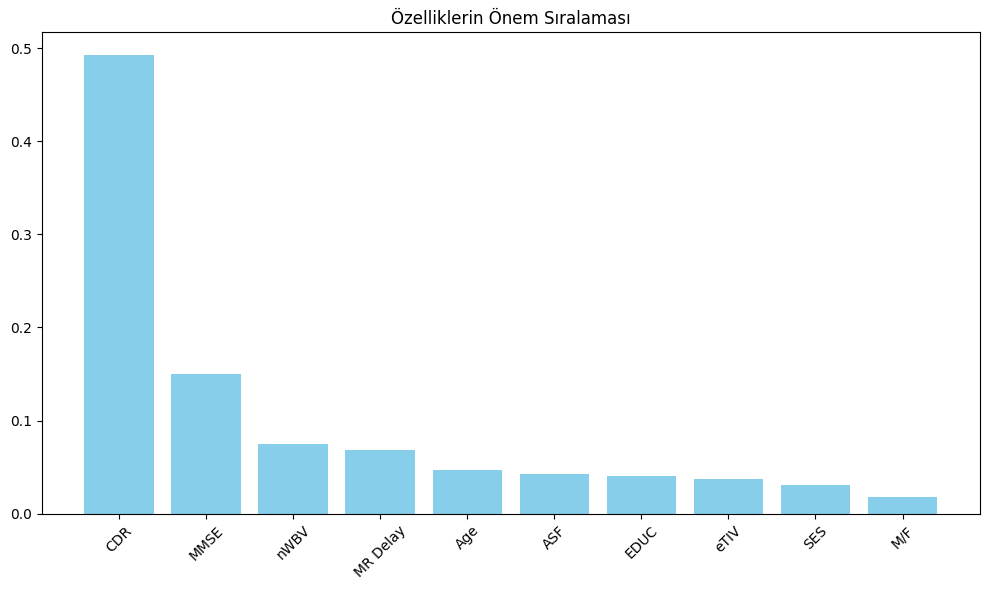

In [557]:
# Özellik önem tablosu
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)
print("\nÖzellik Önem Tablosu:\n", feature_importance_df)

# Özellik önemlerini görselleştir
plt.figure(figsize=(10, 6))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.title("Özelliklerin Önem Sıralaması")
plt.bar(range(X.shape[1]), importances[indices], color='skyblue')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

### Aykırı Değerler fixlenmeden önce | acc : 0.8666666666666667

In [558]:
# Aykırı Değerler fixlenmeden önceye geri dönüş:
oasis = pd.read_csv("oasisUpdateNull.csv")

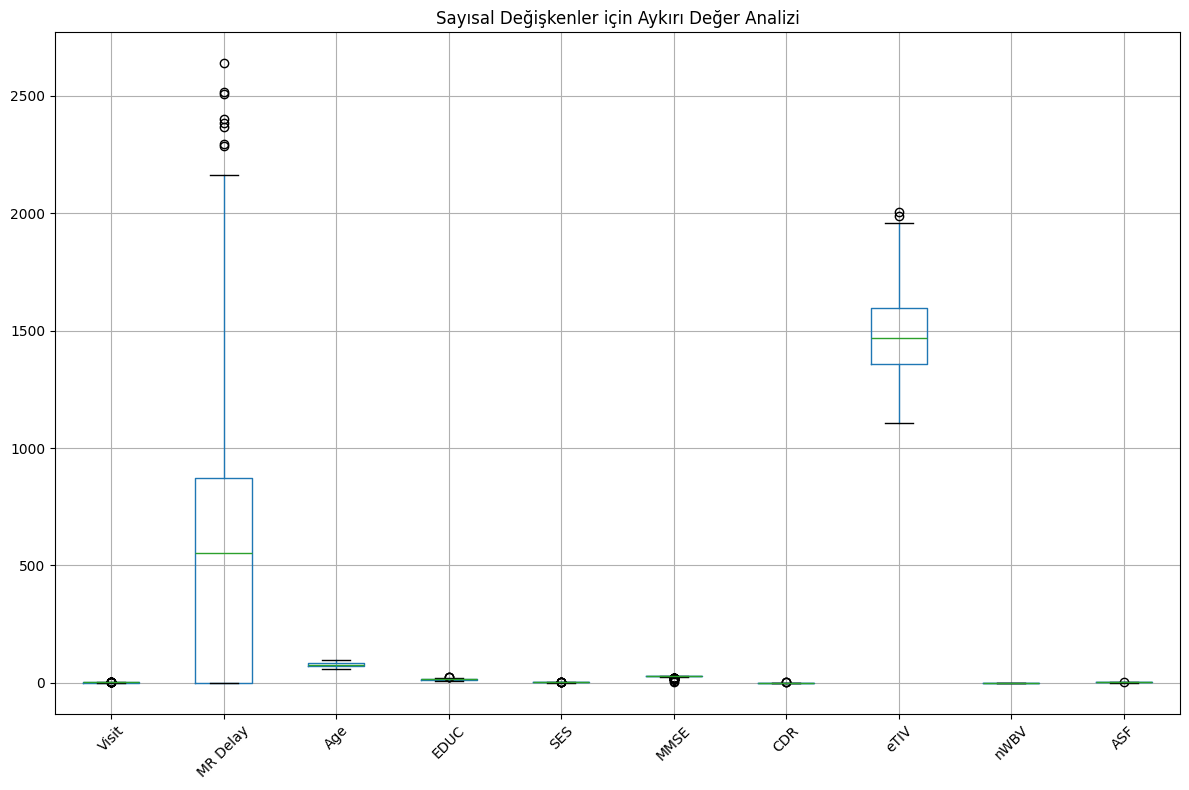

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [559]:
# Sayısal sütunları seç
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# Sayısal sütunlar için kutu grafiği oluşturma
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Sayısal Değişkenler için Aykırı Değer Analizi")
plt.tight_layout()
plt.show()

oasis

Eğitim verisi boyutu: (298, 10)
Test verisi boyutu: (75, 10)
Toplam tahmin sayısı: 75
[1 0 1 2 2 1 1 2 2 1 1 1 2 2 1 2 2 1 2 1 2 2 1 1 2 1 1 2 2 0 1 2 2 1 2 2 2
 2 2 1 2 2 1 0 2 1 1 2 2 1 1 2 1 2 1 2 1 1 2 1 2 2 1 1 0 1 2 2 1 2 1 1 2 2
 2]
Doğruluk Oranı (Accuracy): 0.8666666666666667

 Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75


Karışıklık Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]
Doğruluk Oranı (Accuracy): 0.8666666666666667


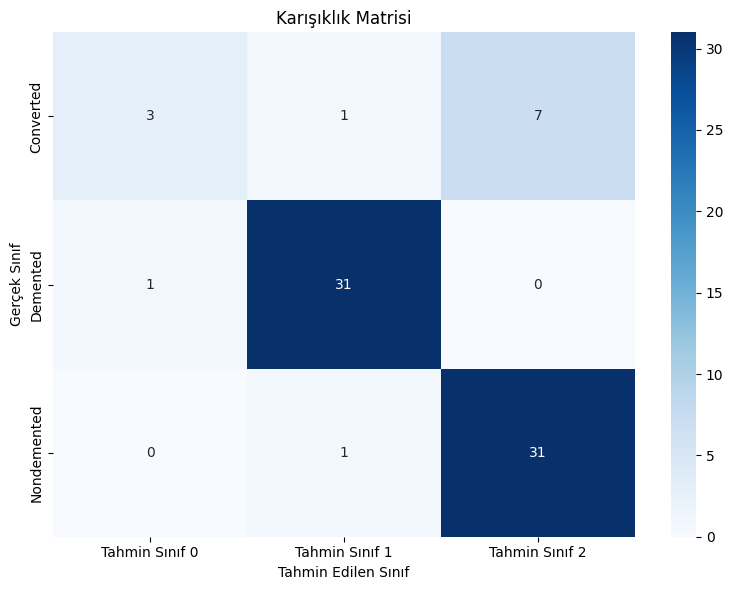

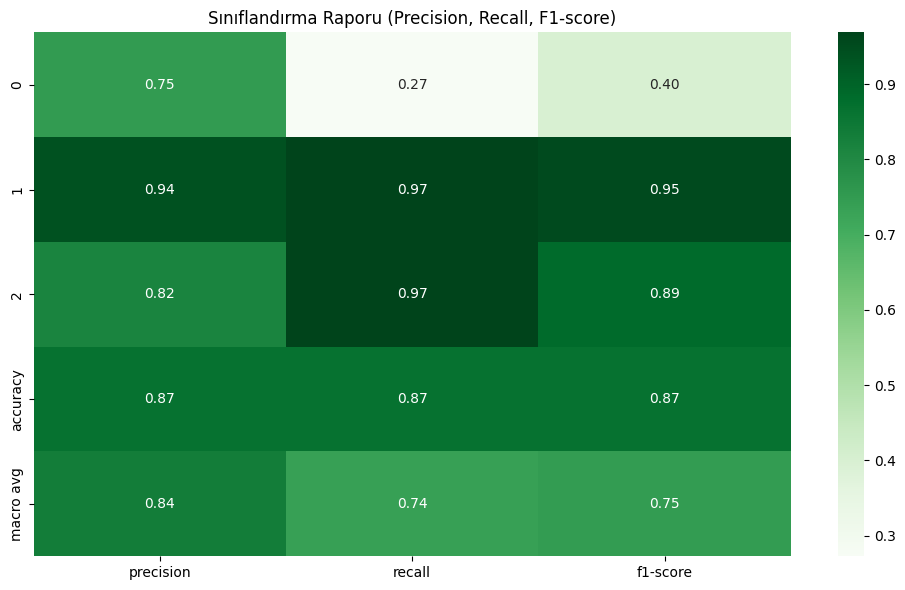

In [560]:
# Aykırı Değerler fixlenmeden önce:
oasis = pd.read_csv("oasisUpdateNull.csv")

le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])  # 0: Converted, 1: Demented, 2: Nondemented
oasis['M/F'] = le.fit_transform(oasis['M/F'])  # 0: F, 1: M
oasis['Hand'] = le.fit_transform(oasis['Hand'])  # (silsek de encode'lu olsun xd)

X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)  # Bağımsız değişkenler (X)
y = oasis['Group']  # Hedef değişken (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluşturulan karar ağacı
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)
print("Toplam tahmin sayısı:", len(y_pred))
print(y_pred)
print("Doğruluk Oranı (Accuracy):", accuracy_score(y_test, y_pred))
print("\n Sınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("Doğruluk Oranı (Accuracy):", accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Tahmin Sınıf 0', 'Tahmin Sınıf 1', 'Tahmin Sınıf 2'], yticklabels=['Converted', 'Demented', 'Nondemented'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.tight_layout()
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu (Precision, Recall, F1-score)")
plt.tight_layout()
plt.show()

### Aykırı değerler fixlendikten sonra | acc : 0.8666666666666667

In [561]:
# Güncel veri tabanımıza geri dönelim:
oasis = pd.read_csv("oasisUpdateMakine.csv")

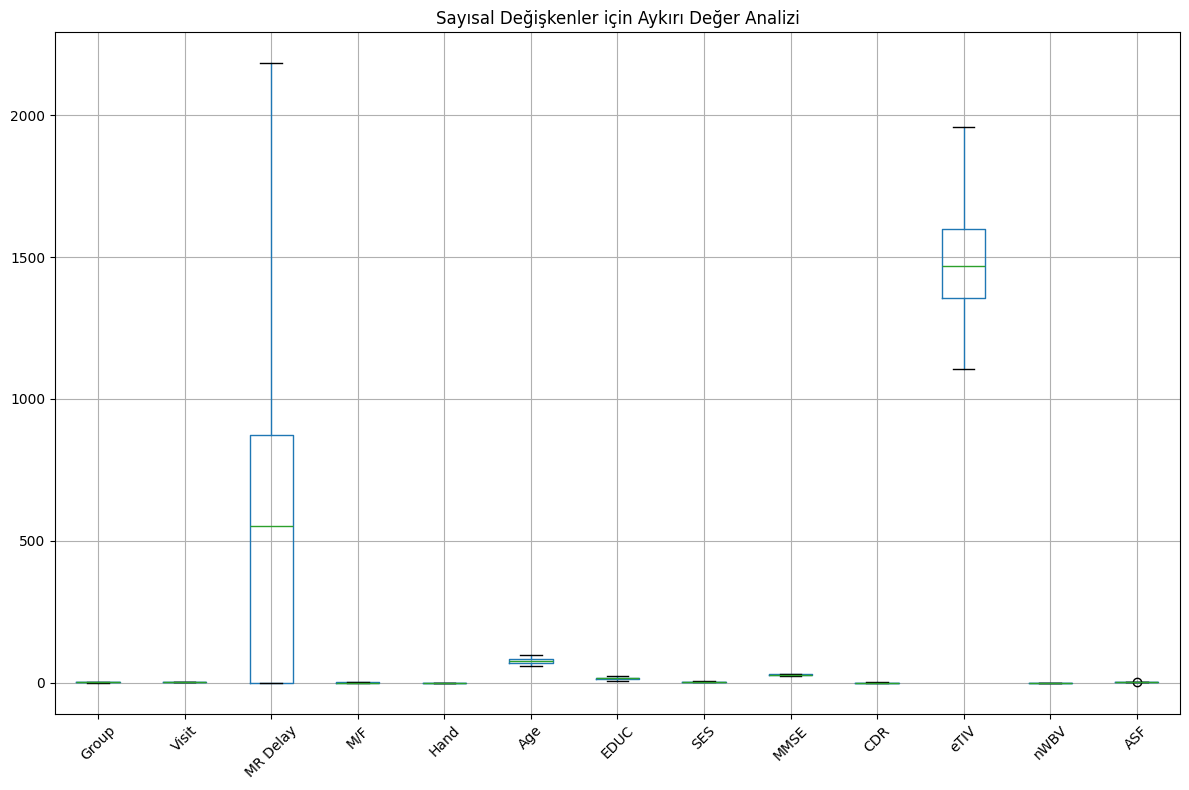

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,2,1.0,0.0,1,0,87,14.0,2.000000,27.0,0.0,1957.0,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,2,2.0,457.0,1,0,88,14.0,2.000000,30.0,0.0,1957.0,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1.0,0.0,1,0,75,12.0,2.460452,23.0,0.5,1678.0,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2.0,560.0,1,0,76,12.0,2.460452,28.0,0.5,1738.0,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3.0,1895.0,1,0,80,12.0,2.460452,22.5,0.5,1698.0,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2.0,842.0,1,0,82,16.0,1.000000,28.0,0.5,1693.0,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,1,3.0,2182.5,1,0,86,16.0,1.000000,26.0,0.5,1688.0,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,2,1.0,0.0,0,0,61,13.0,2.000000,30.0,0.0,1319.0,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,2,2.0,763.0,0,0,63,13.0,2.000000,30.0,0.0,1327.0,0.796,1.323


In [562]:
# Sayısal sütunları seç
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# Sayısal sütunlar için kutu grafiği oluşturma
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Sayısal Değişkenler için Aykırı Değer Analizi")
plt.tight_layout()
plt.show()

oasis

Eğitim verisi boyutu: (298, 10)
Test verisi boyutu: (75, 10)
Toplam tahmin sayısı: 75
[1 0 1 2 2 1 1 2 2 1 1 1 2 2 1 2 2 1 2 1 2 2 1 1 2 1 1 2 2 0 1 2 2 1 2 2 2
 2 2 1 2 2 1 0 2 1 1 2 2 1 1 2 1 2 1 2 1 1 2 1 2 2 1 1 0 1 2 2 1 2 1 1 2 2
 2]
Doğruluk Oranı (Accuracy): 0.8666666666666667

 Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75


Karışıklık Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]
Doğruluk Oranı (Accuracy): 0.8666666666666667


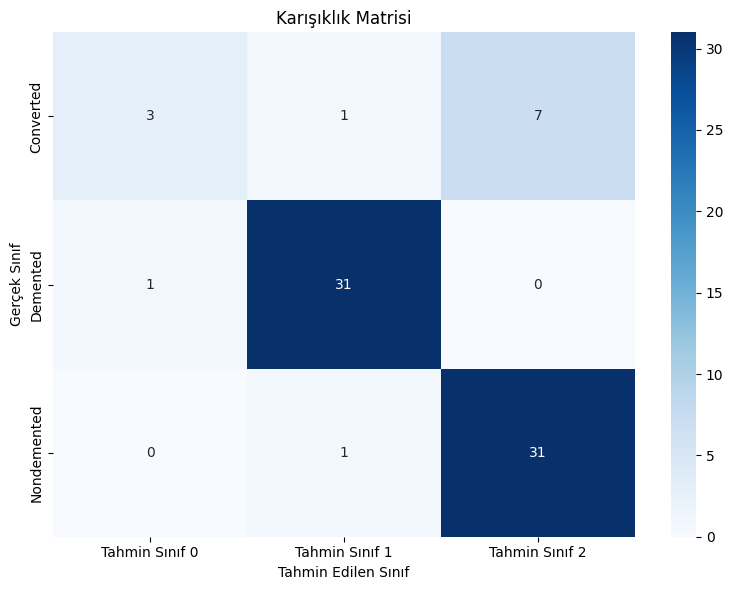

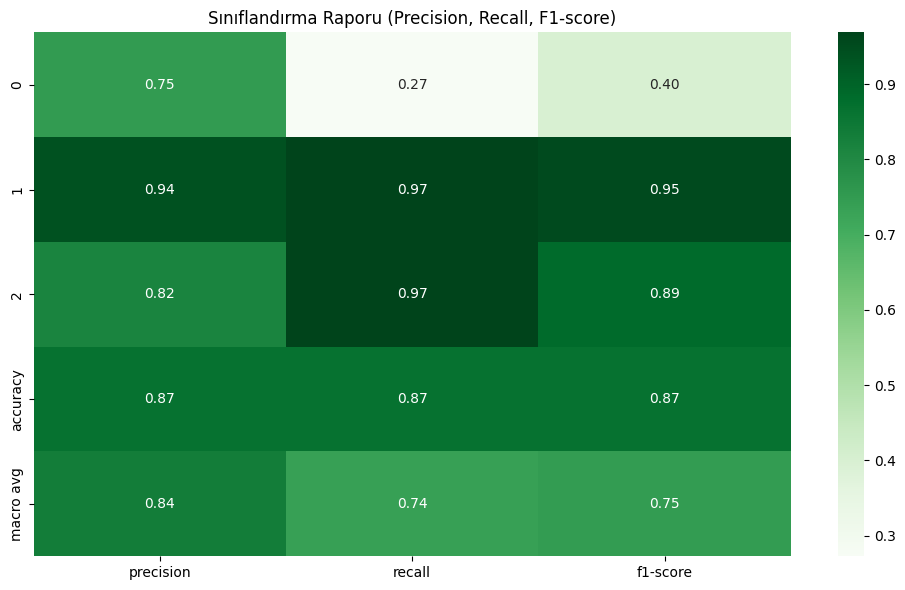

In [563]:
# Güncel veri tabanımıza geri dönelim:
oasis = pd.read_csv("oasisUpdateMakine.csv")

le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])  # 0: Converted, 1: Demented, 2: Nondemented
oasis['M/F'] = le.fit_transform(oasis['M/F'])  # 0: F, 1: M
oasis['Hand'] = le.fit_transform(oasis['Hand'])  # (silsek de encode'lu olsun xd)

X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)  # Bağımsız değişkenler (X)
y = oasis['Group']  # Hedef değişken (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluşturulan karar ağacı
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)
print("Toplam tahmin sayısı:", len(y_pred))
print(y_pred)
print("Doğruluk Oranı (Accuracy):", accuracy_score(y_test, y_pred))
print("\n Sınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("Doğruluk Oranı (Accuracy):", accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Tahmin Sınıf 0', 'Tahmin Sınıf 1', 'Tahmin Sınıf 2'], yticklabels=['Converted', 'Demented', 'Nondemented'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.tight_layout()
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu (Precision, Recall, F1-score)")
plt.tight_layout()
plt.show()

### CDR, MMSE, nWBV, MR Delay, Age, SES, EDUC, ASF, eTIV, M/F | acc : 0.8666666666666667

In [564]:
# Burası, Aykırı değerler fixlendikten sonra'nın aynısıdır!
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)
y = oasis['Group']

Model Doğruluğu (Accuracy): 0.8666666666666667

Karışıklık Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75



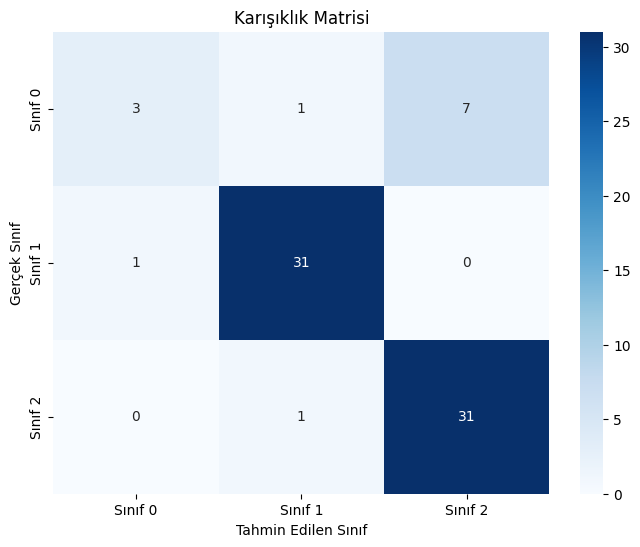

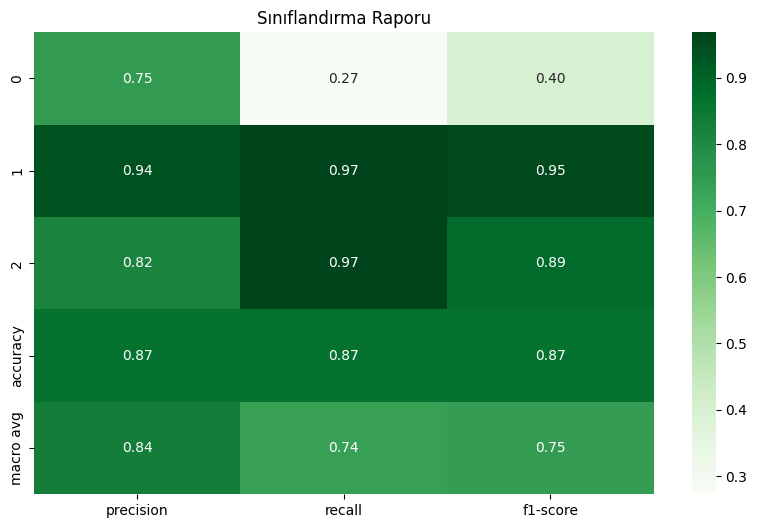

In [565]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluşturulan karar ağacı
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Model performansını değerlendirme
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# Karışıklık Matrisi (Görselleştirme)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()
# Sınıflandırma Raporu (Görselleştirme)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()

### CDR, MMSE, nWBV, MR Delay | acc : 0.84

In [566]:
# Ekstra olarak 'Age', 'SES', 'EDUC', 'ASF', 'eTIV', 'M/F' değerleri alınmayacak
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit', 'M/F', 'eTIV', 'ASF', 'EDUC', 'SES', 'Age'], axis=1)
y = oasis['Group']

Model Doğruluğu (Accuracy): 0.84

Karışıklık Matrisi (Confusion Matrix):
 [[ 4  1  6]
 [ 3 29  0]
 [ 1  1 30]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.94      0.91      0.92        32
           2       0.83      0.94      0.88        32

    accuracy                           0.84        75
   macro avg       0.76      0.74      0.74        75
weighted avg       0.83      0.84      0.83        75



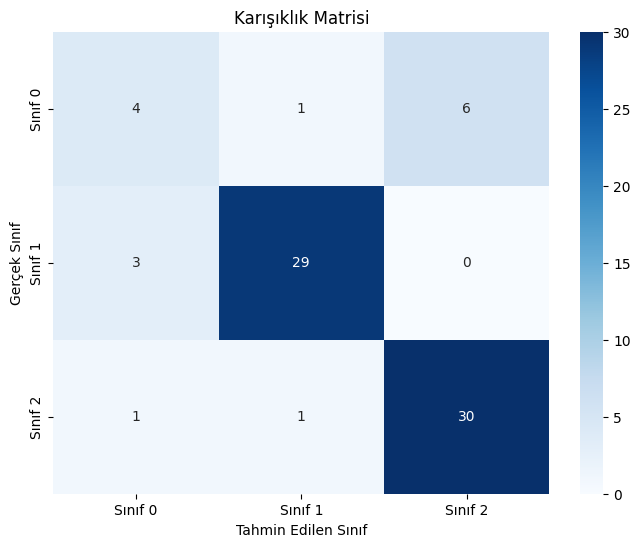

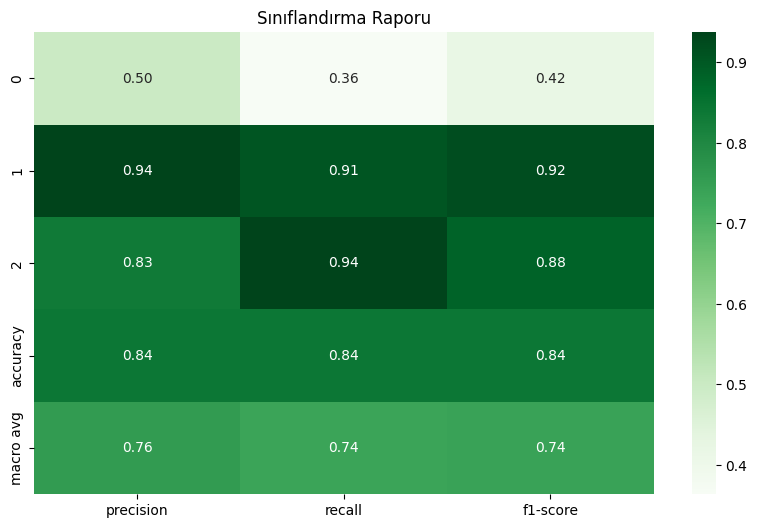

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluşturulan karar ağacı
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Model performansını değerlendirme
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# Karışıklık Matrisi (Görselleştirme)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()
# Sınıflandırma Raporu (Görselleştirme)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()

### CDR, MMSE, nWBV, MR Delay, Age, SES, EDUC, ASF, eTIV | acc : 0.88

In [568]:
# Ekstra olarak 'M/F' değeri alınmayacak
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit', 'M/F'], axis=1)
y = oasis['Group']

Model Doğruluğu (Accuracy): 0.88

Karışıklık Matrisi (Confusion Matrix):
 [[ 4  1  6]
 [ 1 31  0]
 [ 0  1 31]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.80      0.36      0.50        11
           1       0.94      0.97      0.95        32
           2       0.84      0.97      0.90        32

    accuracy                           0.88        75
   macro avg       0.86      0.77      0.78        75
weighted avg       0.88      0.88      0.86        75



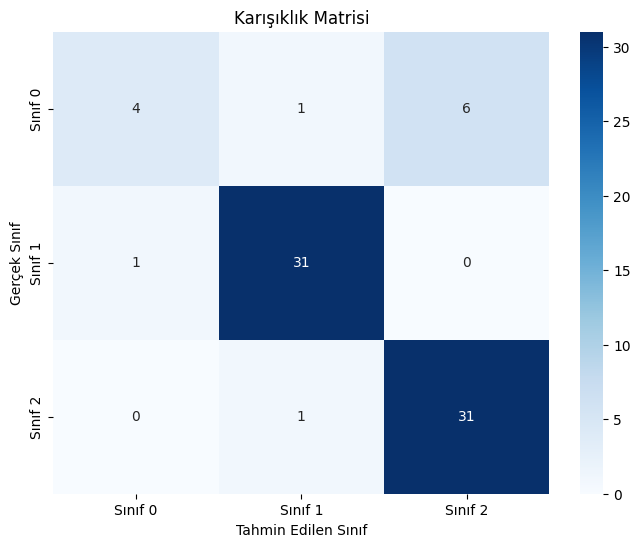

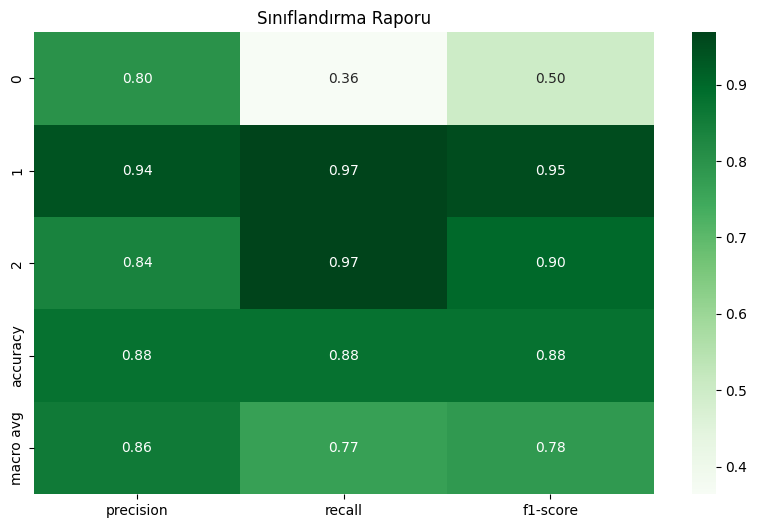

In [569]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluşturulan karar ağacı
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Model performansını değerlendirme
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# Karışıklık Matrisi (Görselleştirme)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()
# Sınıflandırma Raporu (Görselleştirme)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()

# 2. Dönem

In [599]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [600]:
# Veriyi oku
oasis = pd.read_csv("oasisUpdateMakine.csv")

# Veriyi kaydet (2. dönemde kullanılacak veri)
oasis.to_csv("oasisUpdate2.csv", index=False)

# 2. Dönemde kullanılacak veri setini yeniden oku
oasis = pd.read_csv("oasisUpdate2.csv")

## Smote

Doğruluk Oranı (Accuracy): 0.8666666666666667


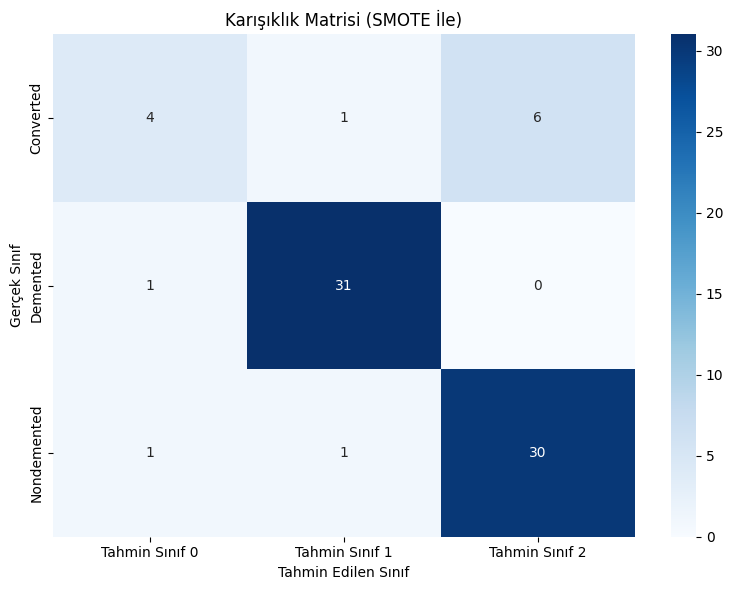

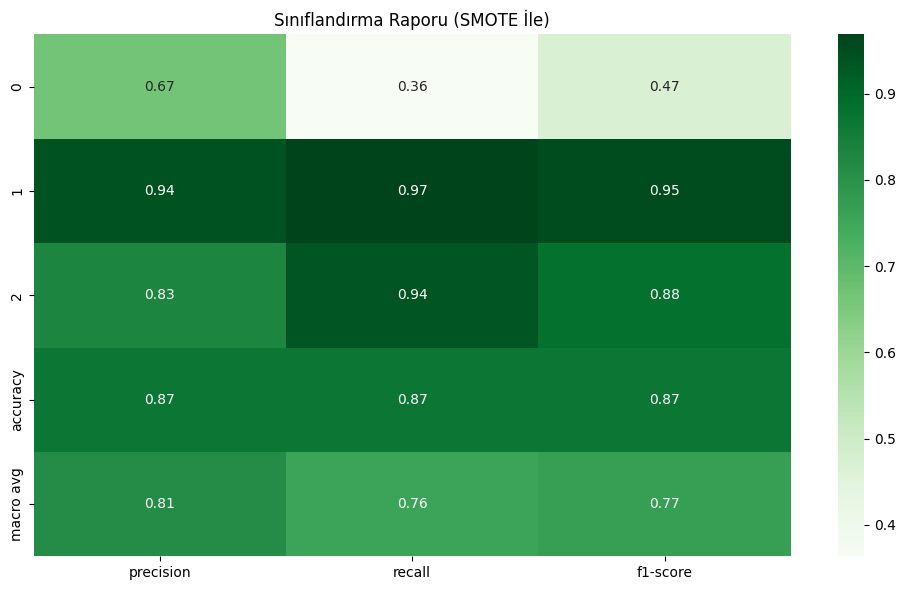

In [601]:
# Kategorik sütunları sayısal verilere çevir (encoding)
le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])  # 0: Converted, 1: Demented, 2: Nondemented
oasis['M/F'] = le.fit_transform(oasis['M/F'])  # 0: F, 1: M
oasis['Hand'] = le.fit_transform(oasis['Hand'])  # (silsek de encode'lu olsun xd)

# Özellikler ve hedef değişken
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)  # 'Subject ID', 'MRI ID', 'Hand', 'Visit' gibi bilgiler dahil edilmez
y = oasis['Group']  # Hedef değişken 'Group'

# Eğitim ve test verilerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE ile yalnızca eğitim verisini dengele
smote = SMOTE(random_state=42)  # Smote'a özel random state
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Random Forest modelini oluştur ve eğit
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Test seti üzerinde tahmin yap
y_pred = rf_model.predict(X_test)

# Model değerlendirme
print("Doğruluk Oranı (Accuracy):", accuracy_score(y_test, y_pred))

# Karışıklık Matrisi (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Tahmin Sınıf 0', 'Tahmin Sınıf 1', 'Tahmin Sınıf 2'], 
            yticklabels=['Converted', 'Demented', 'Nondemented'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi (SMOTE İle)")
plt.tight_layout()
plt.show()

# Sınıflandırma Raporu Görselleştirme
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu (SMOTE İle)")
plt.tight_layout()
plt.show()

Model Doğruluğu (Accuracy): 0.9578947368421052

Karışıklık Matrisi (Confusion Matrix):
 [[29  0  1]
 [ 1 35  0]
 [ 1  1 27]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.97      0.97        36
           2       0.96      0.93      0.95        29

    accuracy                           0.96        95
   macro avg       0.96      0.96      0.96        95
weighted avg       0.96      0.96      0.96        95



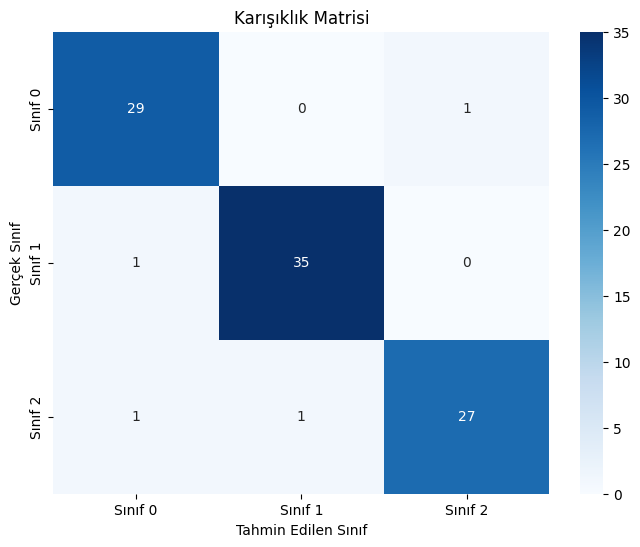

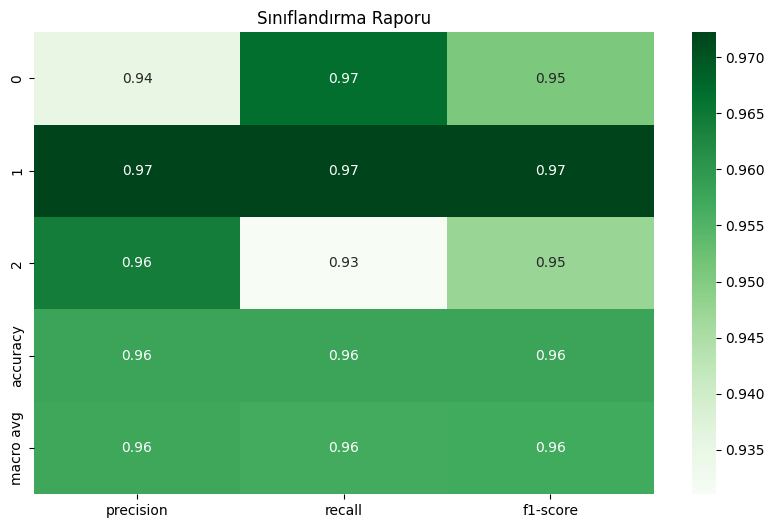

In [602]:
# Eğitim ve test verilerine bölelim (SMOTE uygulandıktan sonra X_train, y_train değiştirildi)
X_train, X_test, y_train, y_test = train_test_split(SmoteX_train, SmoteY_train, test_size=0.2, random_state=42)

# Random Forest modelini oluşturma ve eğitme
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = rf_classifier.predict(X_test)

# Model doğruluğu
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))

# Karışıklık Matrisi (Confusion Matrix)
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))

# Sınıflandırma Raporu (Classification Report)
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))

# Karışıklık Matrisi Görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()

# Sınıflandırma Raporu Görselleştirme
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()

Model Doğruluğu (Accuracy): 0.968421052631579

Karışıklık Matrisi (Confusion Matrix):
 [[32  0  1]
 [ 2 30  0]
 [ 0  0 30]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       1.00      0.94      0.97        32
           2       0.97      1.00      0.98        30

    accuracy                           0.97        95
   macro avg       0.97      0.97      0.97        95
weighted avg       0.97      0.97      0.97        95



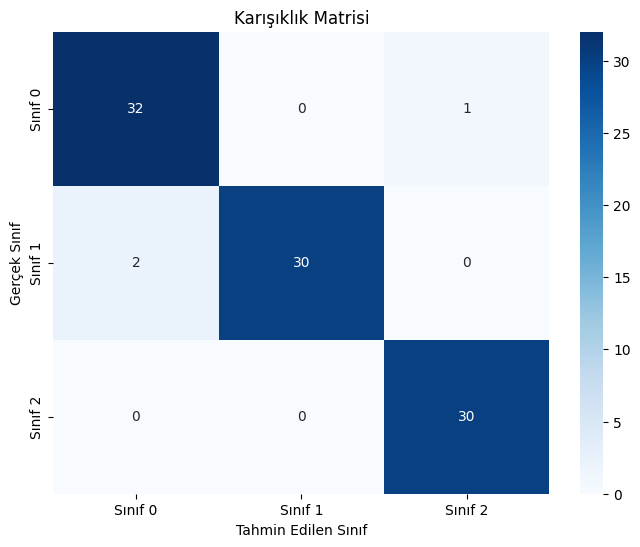

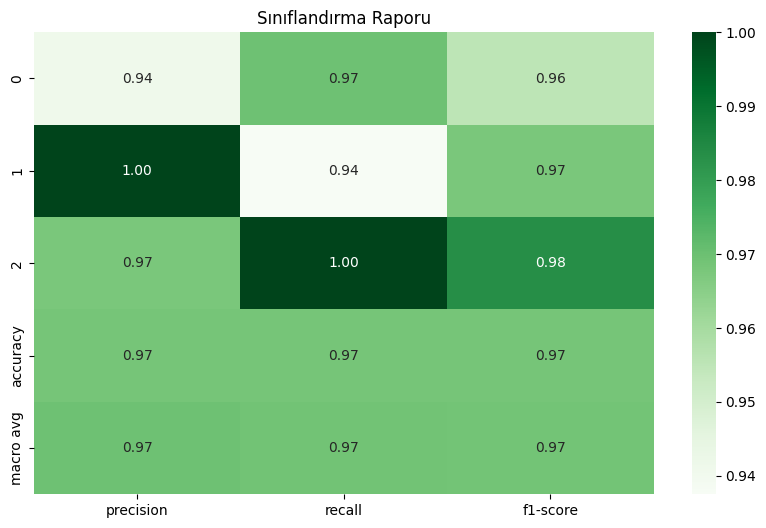

In [603]:
X_train, X_test, y_train, y_test = train_test_split(SmoteX_train, SmoteY_train, test_size=0.2, random_state=7)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()

### ChatGPT

Model Doğruluğu (Accuracy): 0.9066666666666666

Karışıklık Matrisi (Confusion Matrix):
 [[ 2  1  5]
 [ 1 28  0]
 [ 0  0 38]]

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.97      0.97      0.97        29
           2       0.88      1.00      0.94        38

    accuracy                           0.91        75
   macro avg       0.84      0.74      0.76        75
weighted avg       0.89      0.91      0.89        75



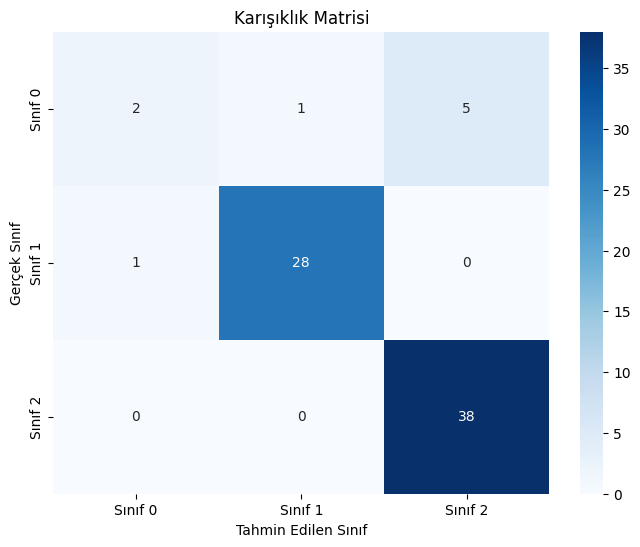

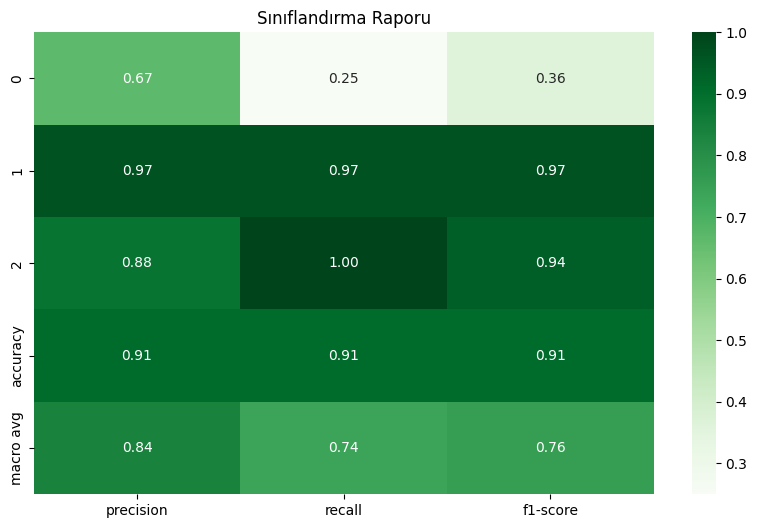

In [604]:
# 1. Veriyi eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y, Eğitim ve test setindeki sınıflar orijinal veri setindeki sınıf oranlarına uygun şekilde ayrılır
# Bu, sınıflar dengesiz olsa bile test setinde her sınıftan örnek olması için önemlidir

# 2. SADECE eğitim verilerine SMOTE uygula
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Random Forest modelini eğit
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_smote, y_train_smote)

# 4. Orijinal test verisiyle tahmin yap
y_pred = rf_classifier.predict(X_test)

# 5. Doğruluk ve raporları yazdır
print("Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))

# 6. Karışıklık Matrisi görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'],
            yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karışıklık Matrisi")
plt.show()

# 7. Sınıflandırma Raporu görselleştirme
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("Sınıflandırma Raporu")
plt.show()


--- RANDOM STATE: 1 ---
SMOTE OLMADAN Doğruluk: 0.9067
SMOTE ile     Doğruluk: 0.9333

--- RANDOM STATE: 4 ---
SMOTE OLMADAN Doğruluk: 0.9067
SMOTE ile     Doğruluk: 0.8800

--- RANDOM STATE: 16 ---
SMOTE OLMADAN Doğruluk: 0.8667
SMOTE ile     Doğruluk: 0.9067

--- RANDOM STATE: 34 ---
SMOTE OLMADAN Doğruluk: 0.8933
SMOTE ile     Doğruluk: 0.9067

--- RANDOM STATE: 42 ---
SMOTE OLMADAN Doğruluk: 0.9067
SMOTE ile     Doğruluk: 0.9067

--- DOĞRULUK KARŞILAŞTIRMASI ---
   Random State  Accuracy (No SMOTE)  Accuracy (With SMOTE)
0             1             0.906667               0.933333
1             4             0.906667               0.880000
2            16             0.866667               0.906667
3            34             0.893333               0.906667
4            42             0.906667               0.906667


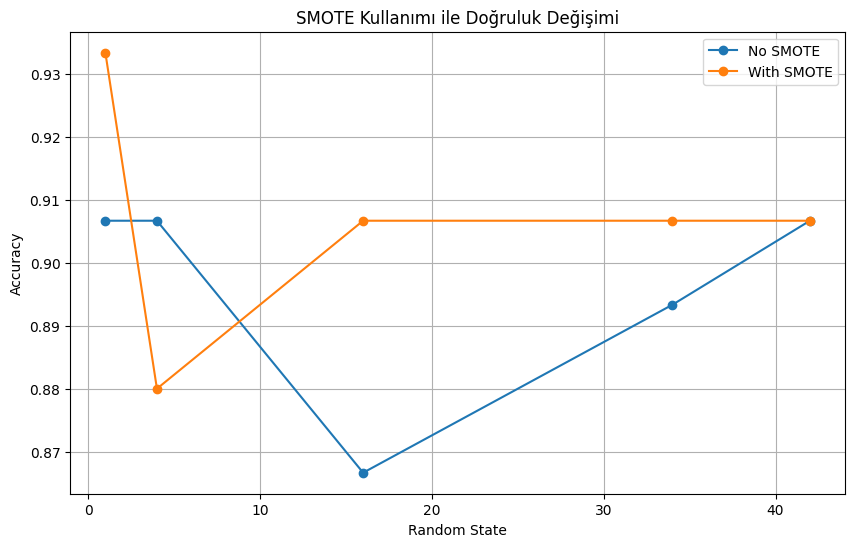

In [605]:
# Random state listesi
random_states = [1, 4, 16, 34, 42]

# Sonuçları tutmak için listeler
results_no_smote = []
results_with_smote = []

# Döngü başlat
for state in random_states:
    print(f"\n--- RANDOM STATE: {state} ---")
    
    # 1. SMOTE OLMADAN MODEL
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=state, stratify=y)
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc_no_smote = accuracy_score(y_test, y_pred)
    results_no_smote.append(acc_no_smote)
    
    print(f"SMOTE OLMADAN Doğruluk: {acc_no_smote:.4f}")
    
    # 2. SMOTE UYGULANARAK MODEL
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_smote.fit(X_train_smote, y_train_smote)
    y_pred_smote = rf_smote.predict(X_test)
    acc_with_smote = accuracy_score(y_test, y_pred_smote)
    results_with_smote.append(acc_with_smote)
    
    print(f"SMOTE ile     Doğruluk: {acc_with_smote:.4f}")

# Sonuçları tablo olarak göster
df_results = pd.DataFrame({
    'Random State': random_states,
    'Accuracy (No SMOTE)': results_no_smote,
    'Accuracy (With SMOTE)': results_with_smote
})

print("\n--- DOĞRULUK KARŞILAŞTIRMASI ---")
print(df_results)

# İstersen grafikle de gösterebiliriz
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(random_states, results_no_smote, marker='o', label='No SMOTE')
plt.plot(random_states, results_with_smote, marker='o', label='With SMOTE')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.title('SMOTE Kullanımı ile Doğruluk Değişimi')
plt.legend()
plt.grid(True)
plt.show()


=== RANDOM STATE: 1 ===
SMOTE OLMADAN Doğruluk Oranı (Accuracy): 0.9067


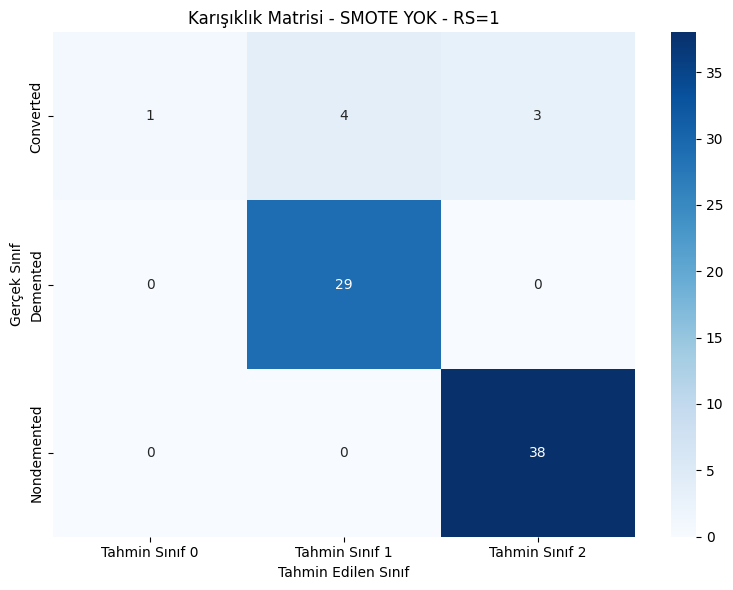

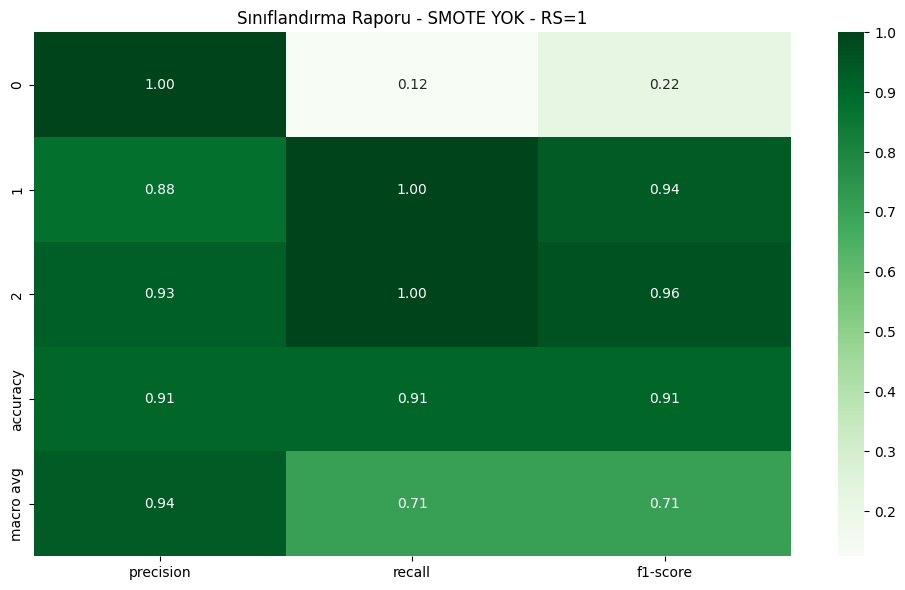

SMOTE ile     Doğruluk Oranı (Accuracy): 0.9333


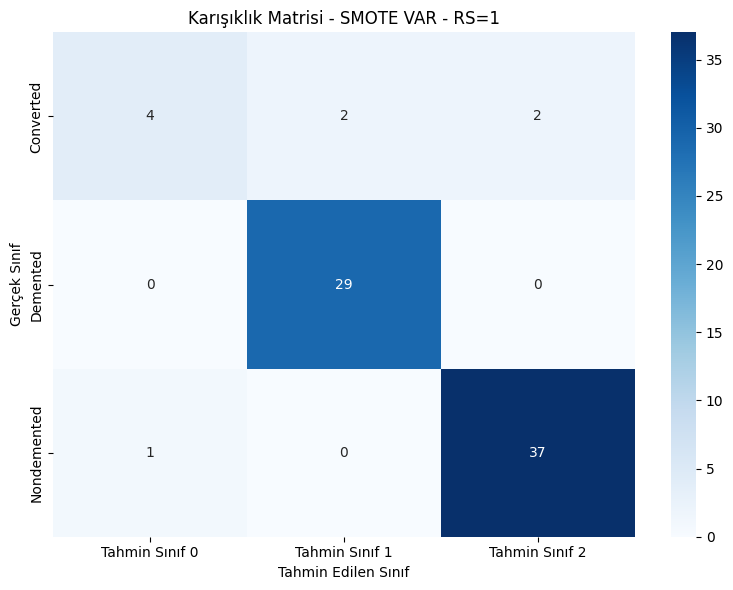

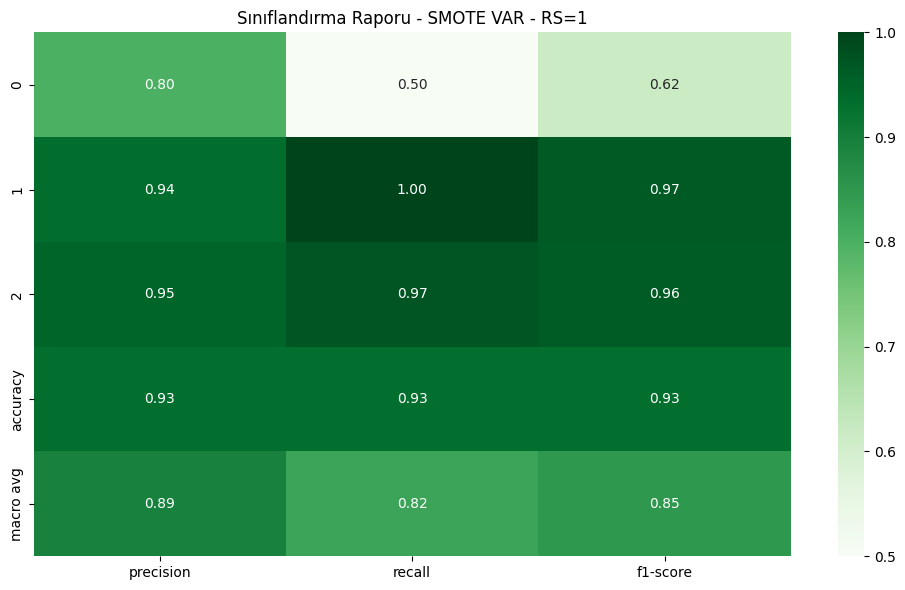


=== RANDOM STATE: 4 ===
SMOTE OLMADAN Doğruluk Oranı (Accuracy): 0.9067


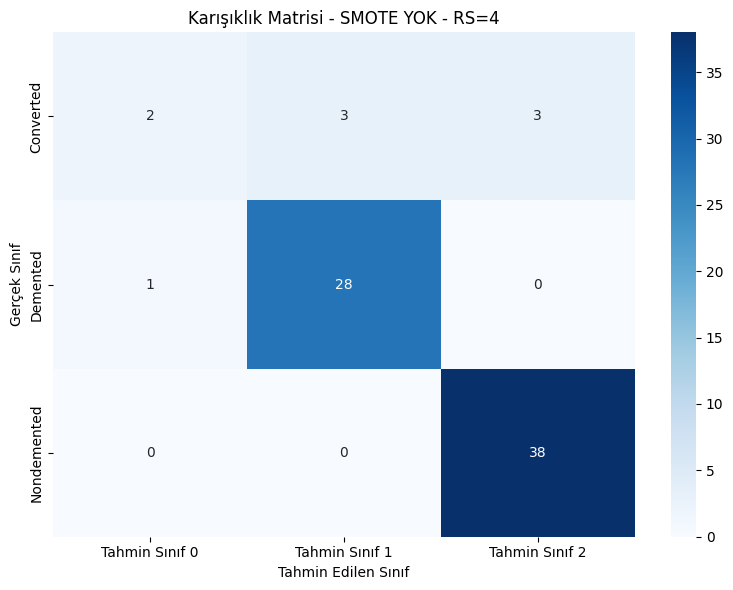

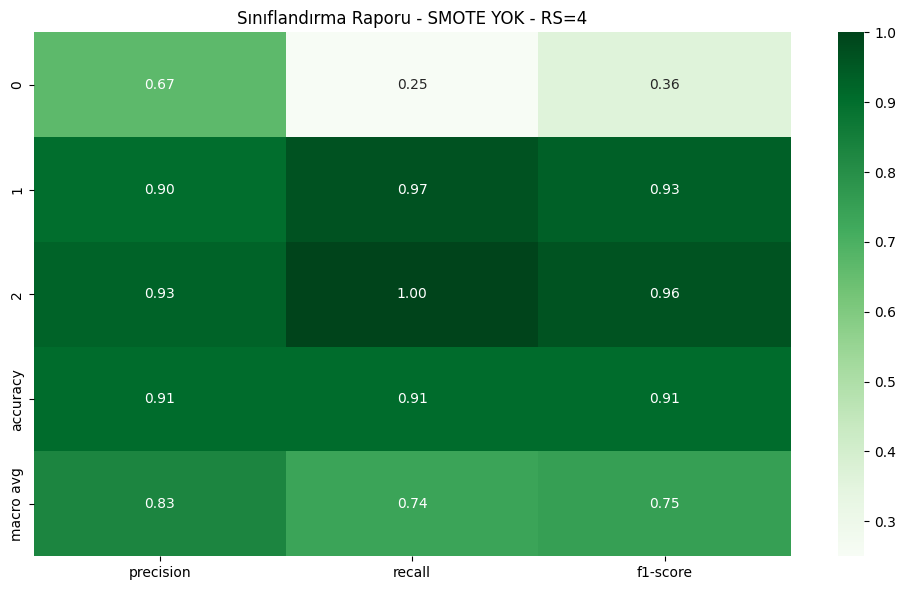

SMOTE ile     Doğruluk Oranı (Accuracy): 0.8800


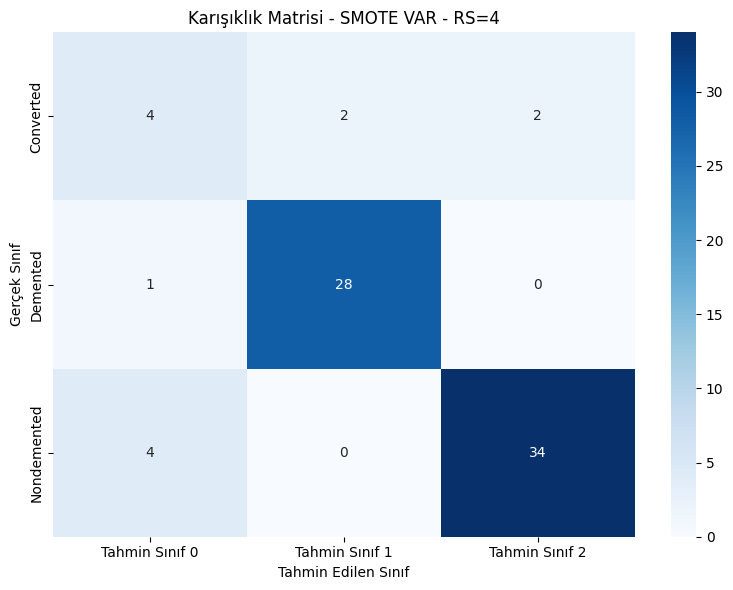

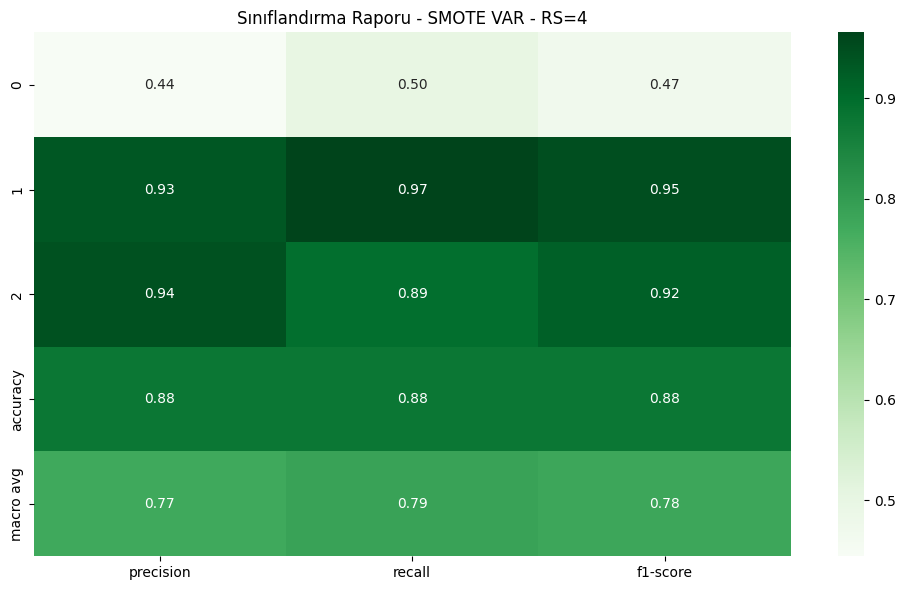


=== RANDOM STATE: 16 ===
SMOTE OLMADAN Doğruluk Oranı (Accuracy): 0.8667


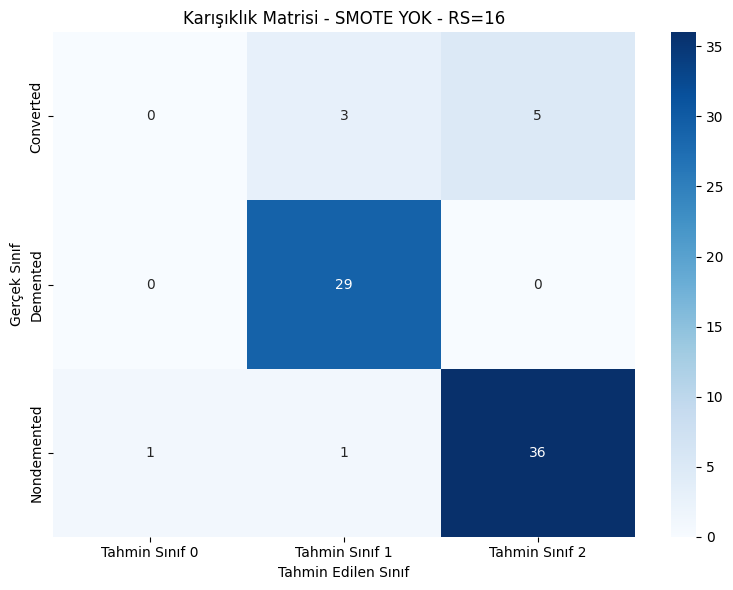

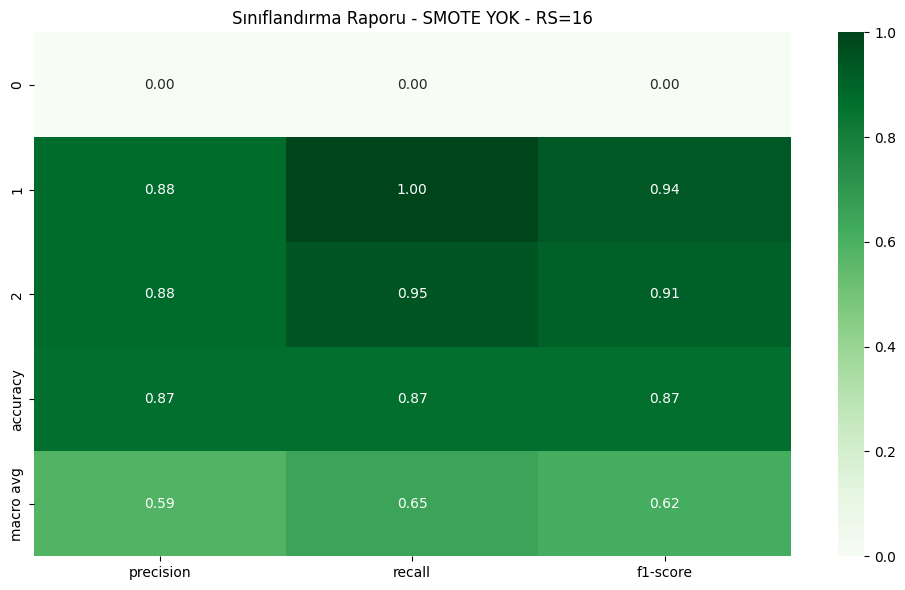

SMOTE ile     Doğruluk Oranı (Accuracy): 0.9067


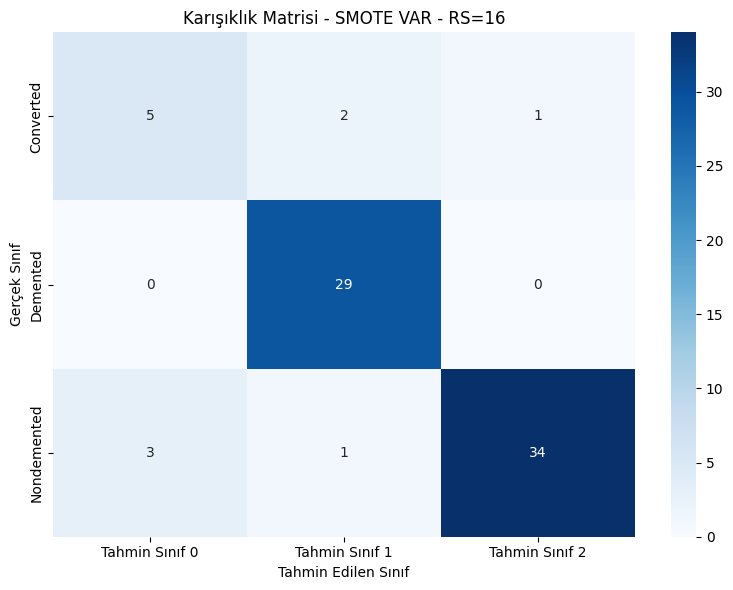

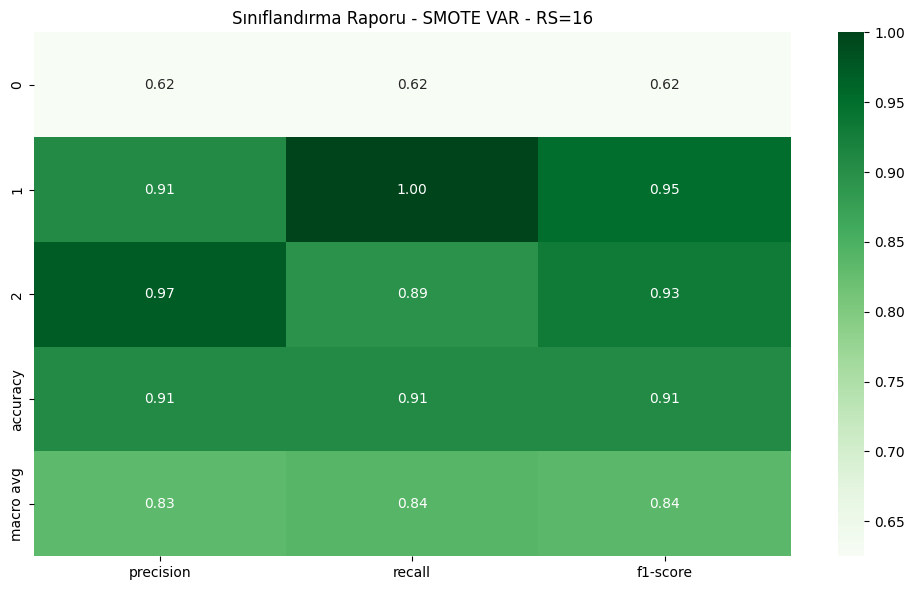


=== RANDOM STATE: 34 ===
SMOTE OLMADAN Doğruluk Oranı (Accuracy): 0.8933


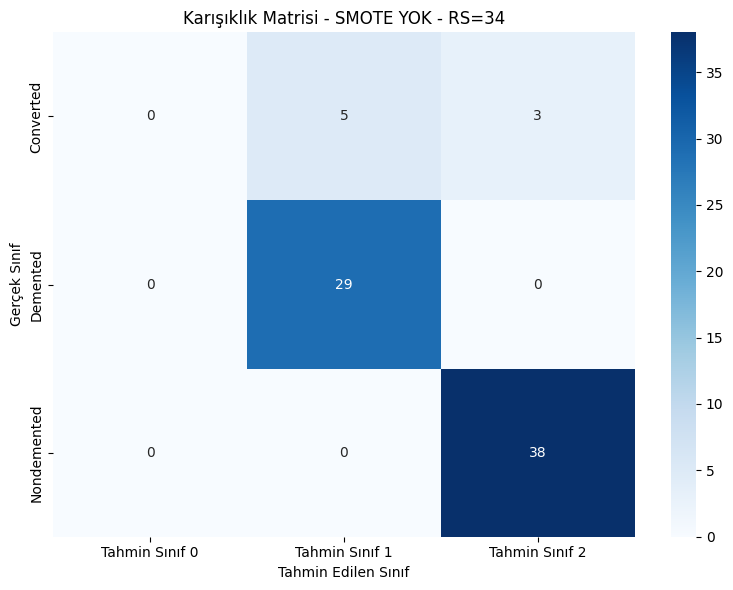

C:\Users\cagin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cagin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cagin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

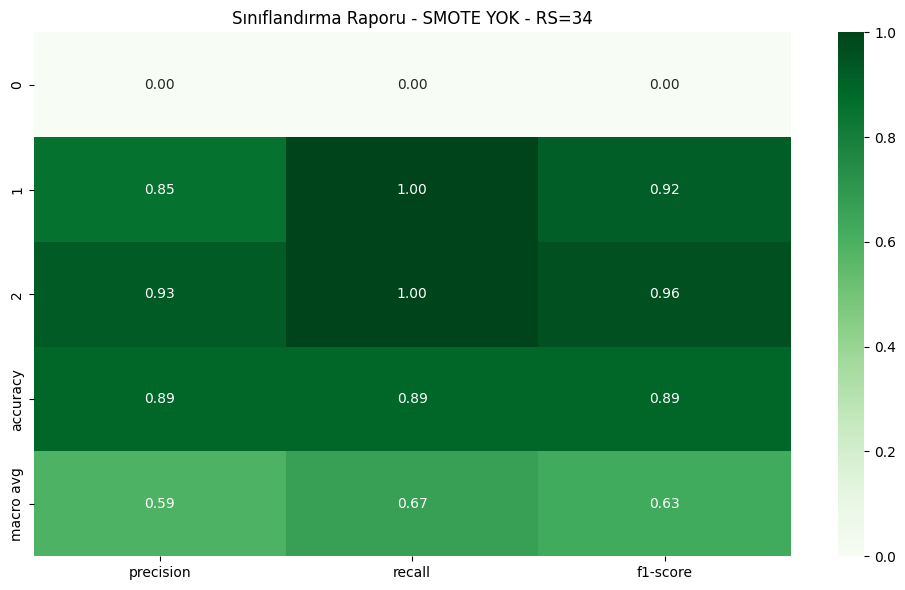

SMOTE ile     Doğruluk Oranı (Accuracy): 0.9067


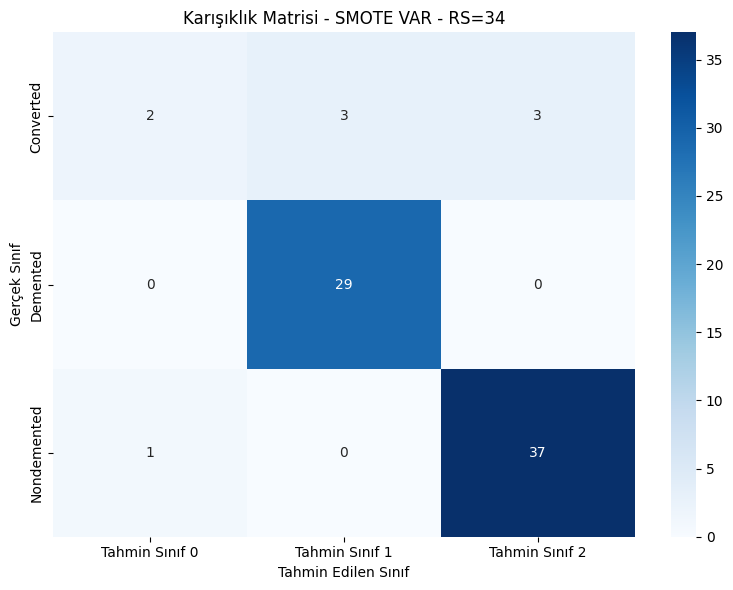

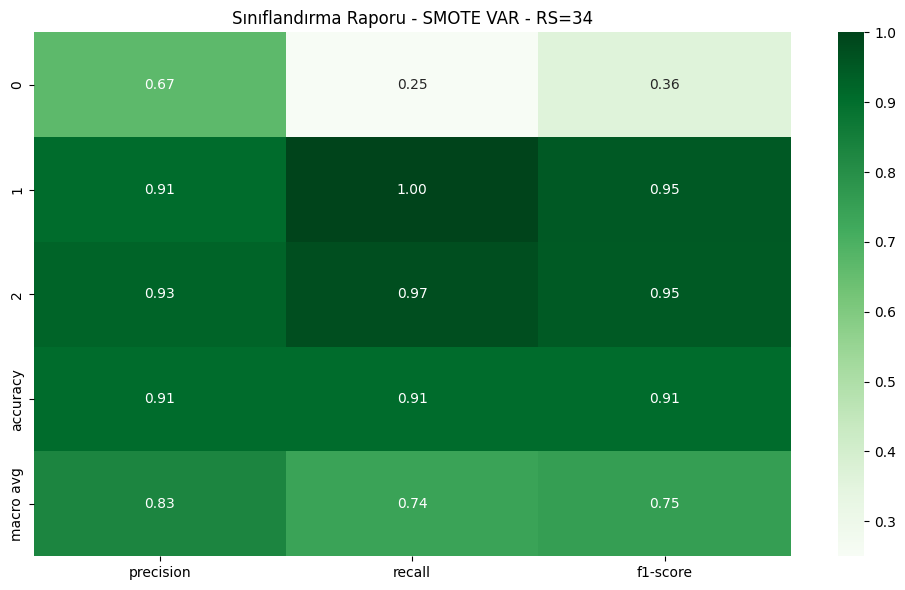


=== RANDOM STATE: 42 ===
SMOTE OLMADAN Doğruluk Oranı (Accuracy): 0.9067


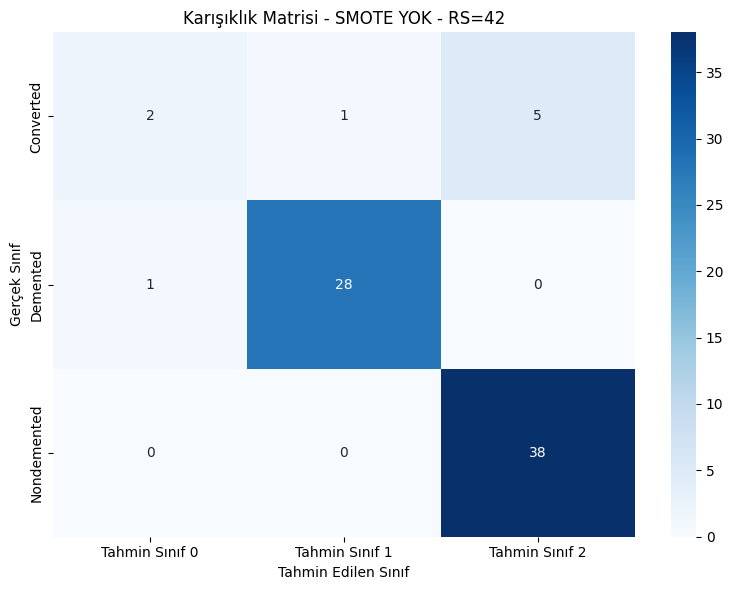

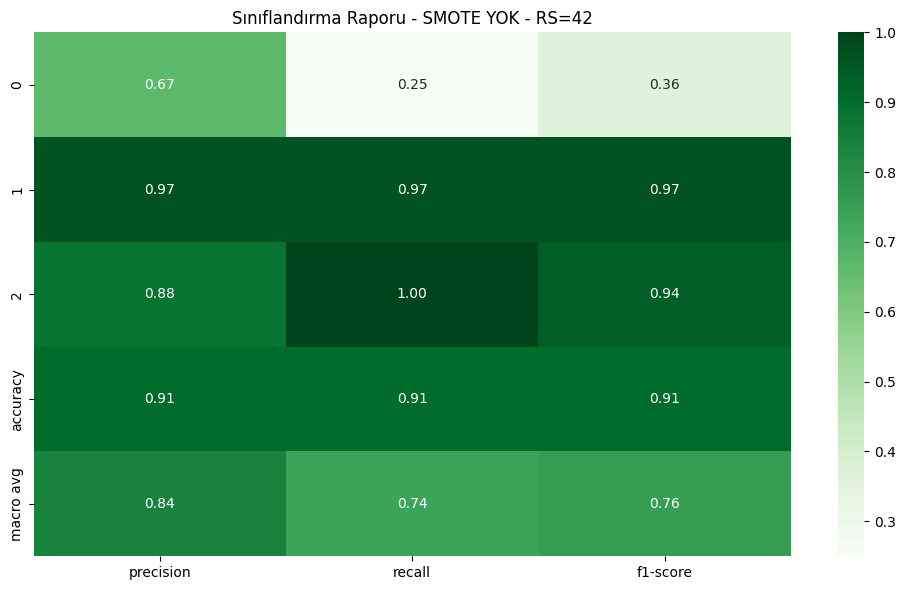

SMOTE ile     Doğruluk Oranı (Accuracy): 0.9067


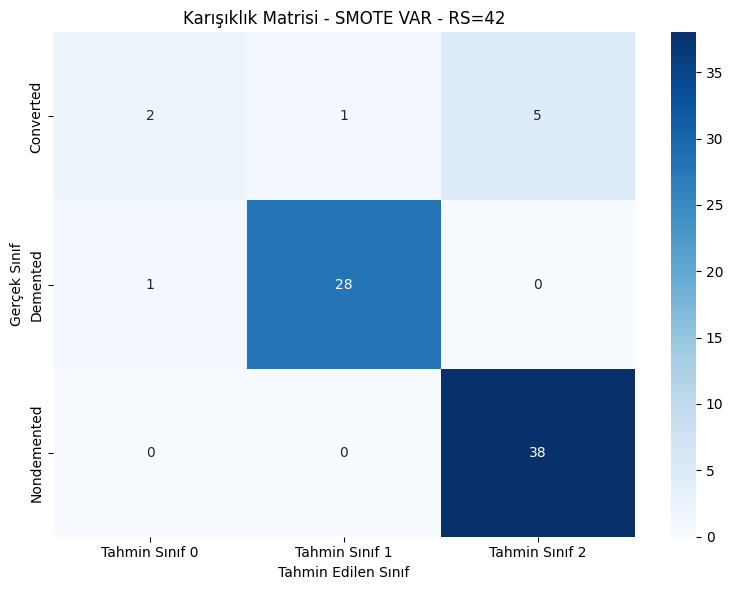

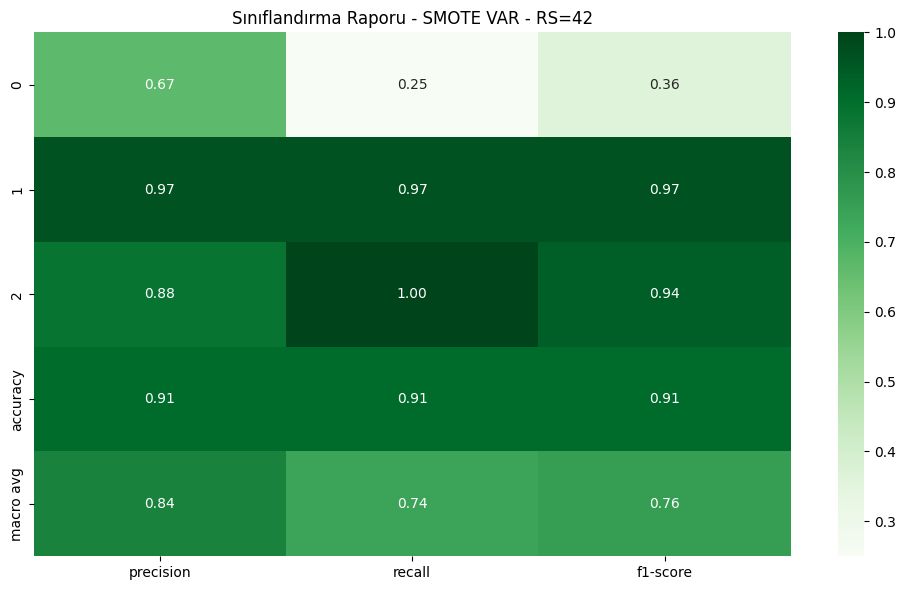


--- DOĞRULUK ORANI KARŞILAŞTIRMASI ---
   Random State  Accuracy (No SMOTE)  Accuracy (With SMOTE)
0             1             0.906667               0.933333
1             4             0.906667               0.880000
2            16             0.866667               0.906667
3            34             0.893333               0.906667
4            42             0.906667               0.906667


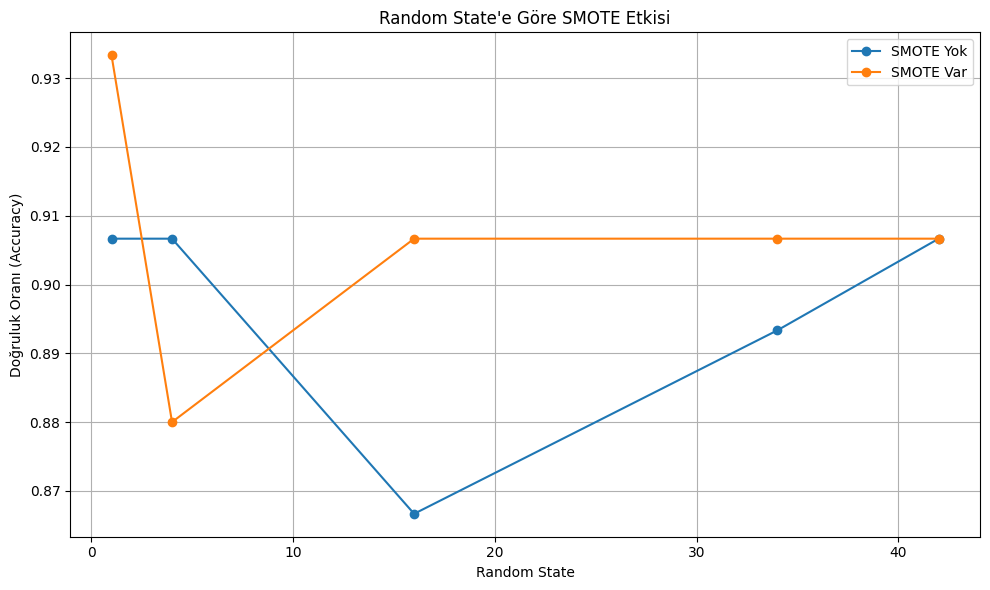

In [606]:
# Random state listesi
random_states = [1, 4, 16, 34, 42]

# Sonuçları saklamak için
results_no_smote = []
results_with_smote = []

# Sınıf adları (etiketler)
class_names = ['Converted', 'Demented', 'Nondemented']
tick_labels = ['Tahmin Sınıf 0', 'Tahmin Sınıf 1', 'Tahmin Sınıf 2']

for state in random_states:
    print(f"\n=== RANDOM STATE: {state} ===")

    # --- SMOTE OLMADAN ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=state, stratify=y)
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    acc_no_smote = accuracy_score(y_test, y_pred)
    results_no_smote.append(acc_no_smote)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"SMOTE OLMADAN Doğruluk Oranı (Accuracy): {acc_no_smote:.4f}")
    
    # Karışıklık Matrisi (SMOTE OLMADAN)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=tick_labels, yticklabels=class_names)
    plt.xlabel("Tahmin Edilen Sınıf")
    plt.ylabel("Gerçek Sınıf")
    plt.title(f"Karışıklık Matrisi - SMOTE YOK - RS={state}")
    plt.tight_layout()
    plt.show()
    
    # Sınıflandırma Raporu (SMOTE OLMADAN)
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
    plt.title(f"Sınıflandırma Raporu - SMOTE YOK - RS={state}")
    plt.tight_layout()
    plt.show()

    # --- SMOTE UYGULANARAK ---
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_smote.fit(X_train_smote, y_train_smote)
    y_pred_smote = rf_smote.predict(X_test)

    acc_with_smote = accuracy_score(y_test, y_pred_smote)
    results_with_smote.append(acc_with_smote)
    cm_smote = confusion_matrix(y_test, y_pred_smote)

    print(f"SMOTE ile     Doğruluk Oranı (Accuracy): {acc_with_smote:.4f}")
    
    # Karışıklık Matrisi (SMOTE İLE)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Blues",
                xticklabels=tick_labels, yticklabels=class_names)
    plt.xlabel("Tahmin Edilen Sınıf")
    plt.ylabel("Gerçek Sınıf")
    plt.title(f"Karışıklık Matrisi - SMOTE VAR - RS={state}")
    plt.tight_layout()
    plt.show()

    # Sınıflandırma Raporu (SMOTE İLE)
    report_dict_smote = classification_report(y_test, y_pred_smote, output_dict=True)
    report_df_smote = pd.DataFrame(report_dict_smote).transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df_smote.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
    plt.title(f"Sınıflandırma Raporu - SMOTE VAR - RS={state}")
    plt.tight_layout()
    plt.show()

# SONUÇLARI TABLODA GÖSTER
df_results = pd.DataFrame({
    'Random State': random_states,
    'Accuracy (No SMOTE)': results_no_smote,
    'Accuracy (With SMOTE)': results_with_smote
})

print("\n--- DOĞRULUK ORANI KARŞILAŞTIRMASI ---")
print(df_results)

# SONUÇLARI GRAFİKLE GÖSTER
plt.figure(figsize=(10, 6))
plt.plot(random_states, results_no_smote, marker='o', label='SMOTE Yok')
plt.plot(random_states, results_with_smote, marker='o', label='SMOTE Var')
plt.xlabel("Random State")
plt.ylabel("Doğruluk Oranı (Accuracy)")
plt.title("Random State'e Göre SMOTE Etkisi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Claude.ai


--- Random State = 1 (SMOTE Olmadan) ---
Doğruluk Oranı: 0.9067
Karışıklık Matrisi:
[[ 1  1  6]
 [ 0 24  0]
 [ 0  0 43]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.96      1.00      0.98        24
           2       0.88      1.00      0.93        43

    accuracy                           0.91        75
   macro avg       0.95      0.71      0.71        75
weighted avg       0.92      0.91      0.87        75


--- Random State = 1 (SMOTE İle) ---
Doğruluk Oranı: 0.8667
Karışıklık Matrisi:
[[ 0  2  6]
 [ 0 24  0]
 [ 2  0 41]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.92      1.00      0.96        24
           2       0.87      0.95      0.91        43

    accuracy                           0.87        75
   macro avg       0.60      0.65      0.62        75
weighted 

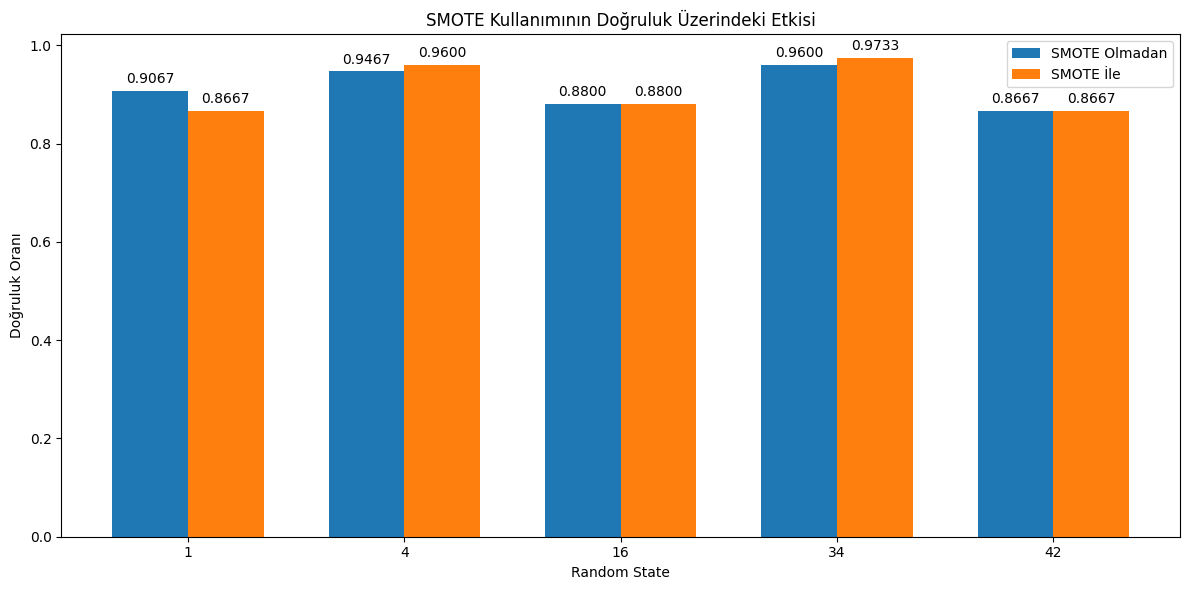

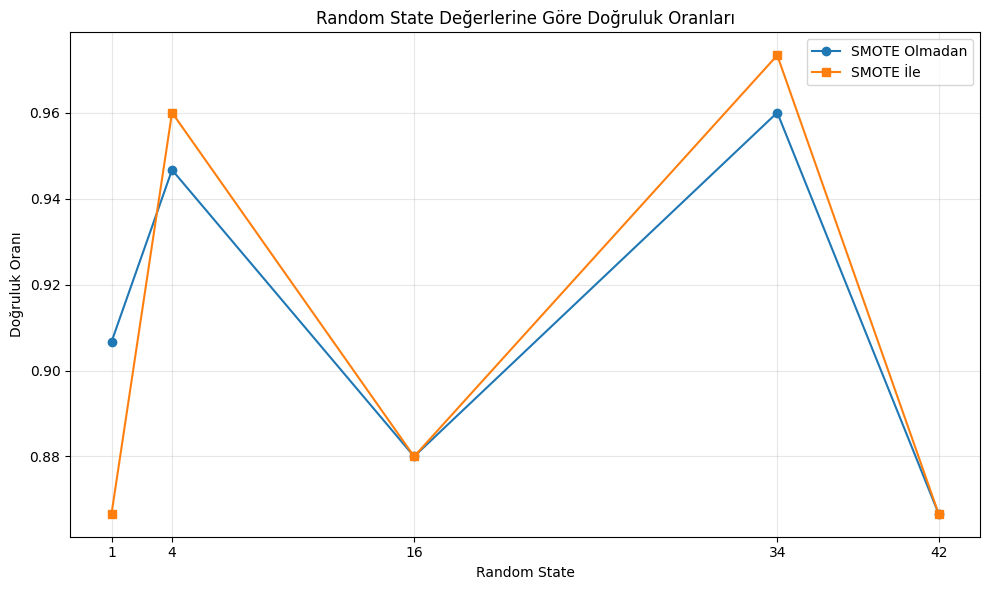

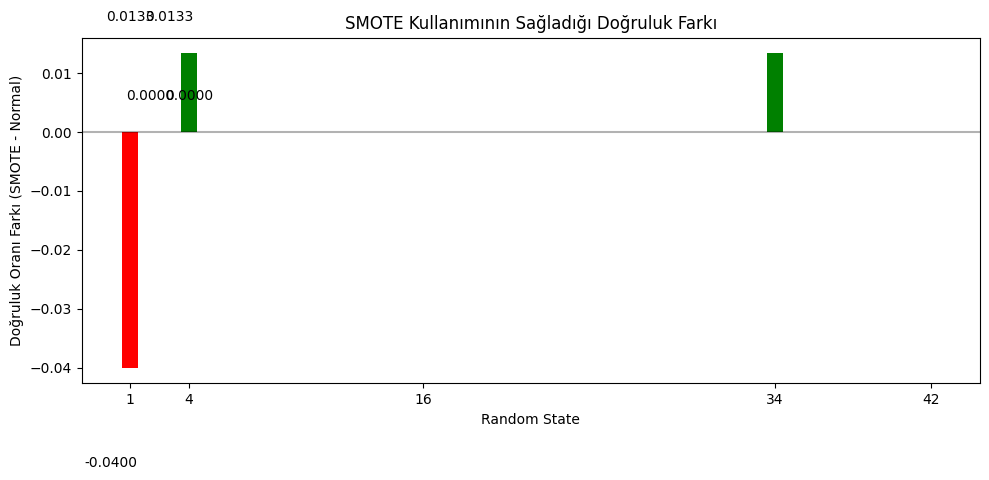

In [607]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns

# Random state değerlerini belirleyin
random_states = [1, 4, 16, 34, 42]

# Sonuçları saklayacağımız sözlükler
accuracy_normal = {}
accuracy_smote = {}

# Her random_state için normal ve SMOTE kullanarak doğruluk hesaplama
for rs in random_states:
    # Normal model (SMOTE olmadan)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=rs)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    
    accuracy_normal[rs] = accuracy_score(y_test, y_pred)
    
    print(f"\n--- Random State = {rs} (SMOTE Olmadan) ---")
    print(f"Doğruluk Oranı: {accuracy_normal[rs]:.4f}")
    print("Karışıklık Matrisi:")
    print(confusion_matrix(y_test, y_pred))
    print("Sınıflandırma Raporu:")
    print(classification_report(y_test, y_pred))
    
    # SMOTE ile model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Sadece eğitim verilerine SMOTE uygulama
    smote = SMOTE(random_state=rs)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=rs)
    rf_classifier.fit(X_train_smote, y_train_smote)
    y_pred = rf_classifier.predict(X_test)
    
    accuracy_smote[rs] = accuracy_score(y_test, y_pred)
    
    print(f"\n--- Random State = {rs} (SMOTE İle) ---")
    print(f"Doğruluk Oranı: {accuracy_smote[rs]:.4f}")
    print("Karışıklık Matrisi:")
    print(confusion_matrix(y_test, y_pred))
    print("Sınıflandırma Raporu:")
    print(classification_report(y_test, y_pred))

# Sonuçları karşılaştırma tablosu
comparison_df = pd.DataFrame({
    'Random State': random_states,
    'Normal Doğruluk': [accuracy_normal[rs] for rs in random_states],
    'SMOTE Doğruluk': [accuracy_smote[rs] for rs in random_states],
    'Fark': [accuracy_smote[rs] - accuracy_normal[rs] for rs in random_states]
})

print("\n--- KARŞILAŞTIRMA TABLOSU ---")
print(comparison_df)

# Görselleştirme
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(random_states))

bar1 = plt.bar(index, comparison_df['Normal Doğruluk'], bar_width, label='SMOTE Olmadan')
bar2 = plt.bar(index + bar_width, comparison_df['SMOTE Doğruluk'], bar_width, label='SMOTE İle')

plt.xlabel('Random State')
plt.ylabel('Doğruluk Oranı')
plt.title('SMOTE Kullanımının Doğruluk Üzerindeki Etkisi')
plt.xticks(index + bar_width/2, random_states)
plt.legend()

# Değerleri çubukların üzerinde gösterme
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.4f}', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()

# Çizgi grafiği ile karşılaştırma
plt.figure(figsize=(10, 6))
plt.plot(random_states, comparison_df['Normal Doğruluk'], 'o-', label='SMOTE Olmadan')
plt.plot(random_states, comparison_df['SMOTE Doğruluk'], 's-', label='SMOTE İle')
plt.xlabel('Random State')
plt.ylabel('Doğruluk Oranı')
plt.title('Random State Değerlerine Göre Doğruluk Oranları')
plt.xticks(random_states)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Doğruluk oranı farkının grafiği
plt.figure(figsize=(10, 5))
colors = ['green' if x > 0 else 'red' for x in comparison_df['Fark']]
plt.bar(random_states, comparison_df['Fark'], color=colors)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Random State')
plt.ylabel('Doğruluk Oranı Farkı (SMOTE - Normal)')
plt.title('SMOTE Kullanımının Sağladığı Doğruluk Farkı')
plt.xticks(random_states)

# Değerleri çubukların üzerinde gösterme
for i, v in enumerate(comparison_df['Fark']):
    plt.text(i, v + (0.005 if v >= 0 else -0.015), 
             f'{v:.4f}', ha='center', 
             va='bottom' if v >= 0 else 'top')

plt.tight_layout()
plt.show()

In [608]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns

# Random state değerlerini belirleyin
random_states = [1, 4, 16, 34, 42]

# Sonuçları saklayacağımız sözlükler
results_normal = {}
results_smote = {}

# Her random_state için normal ve SMOTE kullanarak doğruluk hesaplama
for rs in random_states:
    print(f"\n{'='*50}")
    print(f"RANDOM STATE = {rs}")
    print(f"{'='*50}")
    
    # Normal model (SMOTE olmadan)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=rs)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results_normal[rs] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': cr
    }
    
    print(f"\n--- SMOTE OLMADAN ---")
    print(f"Model Doğruluğu (Accuracy): {accuracy:.4f}")
    print(f"\nKarışıklık Matrisi (Confusion Matrix):")
    print(cm)
    print(f"\nSınıflandırma Raporu (Classification Report):")
    print(cr)
    
    # SMOTE ile model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Sadece eğitim verilerine SMOTE uygulama
    smote = SMOTE(random_state=rs)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=rs)
    rf_classifier.fit(X_train_smote, y_train_smote)
    y_pred = rf_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results_smote[rs] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': cr
    }
    
    print(f"\n--- SMOTE İLE ---")
    print(f"Model Doğruluğu (Accuracy): {accuracy:.4f}")
    print(f"\nKarışıklık Matrisi (Confusion Matrix):")
    print(cm)
    print(f"\nSınıflandırma Raporu (Classification Report):")
    print(cr)

# Karşılaştırma tablosu için doğruluk değerlerini toplama
comparison_df = pd.DataFrame({
    'Random State': random_states,
    'Normal Doğruluk': [results_normal[rs]['accuracy'] for rs in random_states],
    'SMOTE Doğruluk': [results_smote[rs]['accuracy'] for rs in random_states],
    'Fark': [results_smote[rs]['accuracy'] - results_normal[rs]['accuracy'] for rs in random_states]
})

print("\n\n")
print("="*70)
print("DOĞRULUK KARŞILAŞTIRMA TABLOSU")
print("="*70)
print(comparison_df)
print("\n")

# Doğruluk değerlerinin görselleştirilmesi
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(random_states))

bar1 = plt.bar(index, comparison_df['Normal Doğruluk'], bar_width, label='SMOTE Olmadan')
bar2 = plt.bar(index + bar_width, comparison_df['SMOTE Doğruluk'], bar_width, label='SMOTE İle')

plt.xlabel('Random State')
plt.ylabel('Model Doğruluğu (Accuracy)')
plt.title('SMOTE Kullanımının Model Doğruluğu Üzerindeki Etkisi')
plt.xticks(index + bar_width/2, random_states)
plt.legend()

# Değerleri çubukların üzerinde gösterme
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.4f}', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()

# Tüm karışıklık matrislerinin görselleştirilmesi
plt.figure(figsize=(16, 12))

for i, rs in enumerate(random_states):
    # Normal model confusion matrix
    plt.subplot(5, 2, 2*i+1)
    sns.heatmap(results_normal[rs]['confusion_matrix'], annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], 
                yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
    plt.title(f"Normal Model, RS={rs}, Accuracy={results_normal[rs]['accuracy']:.4f}")
    plt.xlabel("Tahmin Edilen Sınıf")
    plt.ylabel("Gerçek Sınıf")
    
    # SMOTE model confusion matrix
    plt.subplot(5, 2, 2*i+2)
    sns.heatmap(results_smote[rs]['confusion_matrix'], annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], 
                yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
    plt.title(f"SMOTE Model, RS={rs}, Accuracy={results_smote[rs]['accuracy']:.4f}")
    plt.xlabel("Tahmin Edilen Sınıf")
    plt.ylabel("Gerçek Sınıf")

plt.tight_layout()
plt.show()

# Doğruluk oranı karşılaştırma grafiği
plt.figure(figsize=(10, 6))
plt.plot(random_states, comparison_df['Normal Doğruluk'], 'o-', linewidth=2, markersize=8, label='SMOTE Olmadan')
plt.plot(random_states, comparison_df['SMOTE Doğruluk'], 's-', linewidth=2, markersize=8, label='SMOTE İle')
plt.xlabel('Random State')
plt.ylabel('Model Doğruluğu (Accuracy)')
plt.title('Random State Değerlerine Göre Model Doğrulukları')
plt.xticks(random_states)
plt.legend()
plt.grid(True, alpha=0.3)

# Değerleri noktaların üzerinde gösterme
for i, rs in enumerate(random_states):
    plt.text(rs, comparison_df['Normal Doğruluk'][i] + 0.01, f"{comparison_df['Normal Doğruluk'][i]:.4f}", 
             ha='center', va='bottom')
    plt.text(rs, comparison_df['SMOTE Doğruluk'][i] - 0.01, f"{comparison_df['SMOTE Doğruluk'][i]:.4f}", 
             ha='center', va='top')

plt.tight_layout()
plt.show()import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Random state değerlerini belirleyin
random_states = [1, 4, 16, 34, 42]

# Sonuçları saklayacağımız sözlükler
results_normal = {}
results_smote = {}

# Her random_state için normal ve SMOTE kullanarak doğruluk hesaplama
for rs in random_states:
    print(f"\n{'='*50}")
    print(f"RANDOM STATE = {rs}")
    print(f"{'='*50}")
    
    # Normal model (SMOTE olmadan)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=rs)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results_normal[rs] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': cr
    }
    
    print(f"\n--- SMOTE OLMADAN ---")
    print(f"Model Doğruluğu (Accuracy): {accuracy:.4f}")
    print(f"\nKarışıklık Matrisi (Confusion Matrix):")
    print(cm)
    print(f"\nSınıflandırma Raporu (Classification Report):")
    print(cr)
    
    # SMOTE ile model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Sadece eğitim verilerine SMOTE uygulama
    smote = SMOTE(random_state=rs)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=rs)
    rf_classifier.fit(X_train_smote, y_train_smote)
    y_pred = rf_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results_smote[rs] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': cr
    }
    
    print(f"\n--- SMOTE İLE ---")
    print(f"Model Doğruluğu (Accuracy): {accuracy:.4f}")
    print(f"\nKarışıklık Matrisi (Confusion Matrix):")
    print(cm)
    print(f"\nSınıflandırma Raporu (Classification Report):")
    print(cr)

# Karşılaştırma tablosu için doğruluk değerlerini toplama
comparison_df = pd.DataFrame({
    'Random State': random_states,
    'Normal Doğruluk': [results_normal[rs]['accuracy'] for rs in random_states],
    'SMOTE Doğruluk': [results_smote[rs]['accuracy'] for rs in random_states],
    'Fark': [results_smote[rs]['accuracy'] - results_normal[rs]['accuracy'] for rs in random_states]
})

print("\n\n")
print("="*70)
print("DOĞRULUK KARŞILAŞTIRMA TABLOSU")
print("="*70)
print(comparison_df)
print("\n")

# Doğruluk değerlerinin görselleştirilmesi
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(random_states))

bar1 = plt.bar(index, comparison_df['Normal Doğruluk'], bar_width, label='SMOTE Olmadan')
bar2 = plt.bar(index + bar_width, comparison_df['SMOTE Doğruluk'], bar_width, label='SMOTE İle')

plt.xlabel('Random State')
plt.ylabel('Model Doğruluğu (Accuracy)')
plt.title('SMOTE Kullanımının Model Doğruluğu Üzerindeki Etkisi')
plt.xticks(index + bar_width/2, random_states)
plt.legend()

# Değerleri çubukların üzerinde gösterme
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.4f}', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()

# Tüm karışıklık matrislerinin görselleştirilmesi
plt.figure(figsize=(16, 12))

for i, rs in enumerate(random_states):
    # Normal model confusion matrix
    plt.subplot(5, 2, 2*i+1)
    sns.heatmap(results_normal[rs]['confusion_matrix'], annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], 
                yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
    plt.title(f"Normal Model, RS={rs}, Accuracy={results_normal[rs]['accuracy']:.4f}")
    plt.xlabel("Tahmin Edilen Sınıf")
    plt.ylabel("Gerçek Sınıf")
    
    # SMOTE model confusion matrix
    plt.subplot(5, 2, 2*i+2)
    sns.heatmap(results_smote[rs]['confusion_matrix'], annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], 
                yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'])
    plt.title(f"SMOTE Model, RS={rs}, Accuracy={results_smote[rs]['accuracy']:.4f}")
    plt.xlabel("Tahmin Edilen Sınıf")
    plt.ylabel("Gerçek Sınıf")

plt.tight_layout()
plt.show()

# Doğruluk oranı karşılaştırma grafiği
plt.figure(figsize=(10, 6))
plt.plot(random_states, comparison_df['Normal Doğruluk'], 'o-', linewidth=2, markersize=8, label='SMOTE Olmadan')
plt.plot(random_states, comparison_df['SMOTE Doğruluk'], 's-', linewidth=2, markersize=8, label='SMOTE İle')
plt.xlabel('Random State')
plt.ylabel('Model Doğruluğu (Accuracy)')
plt.title('Random State Değerlerine Göre Model Doğrulukları')
plt.xticks(random_states)
plt.legend()
plt.grid(True, alpha=0.3)

# Değerleri noktaların üzerinde gösterme
for i, rs in enumerate(random_states):
    plt.text(rs, comparison_df['Normal Doğruluk'][i] + 0.01, f"{comparison_df['Normal Doğruluk'][i]:.4f}", 
             ha='center', va='bottom')
    plt.text(rs, comparison_df['SMOTE Doğruluk'][i] - 0.01, f"{comparison_df['SMOTE Doğruluk'][i]:.4f}", 
             ha='center', va='top')

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (2214397014.py, line 161)

In [ ]:
# RANDOM STATE belirle
random_state = 41

# 1. Veriyi eğitim ve test olarak ayır (henüz SMOTE uygulama)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

# 2. SMOTE OLMADAN model
rf_no_smote = RandomForestClassifier(n_estimators=100, random_state=random_state)
rf_no_smote.fit(X_train, y_train)
y_pred_no_smote = rf_no_smote.predict(X_test)

acc_no_smote = accuracy_score(y_test, y_pred_no_smote)
print("SMOTE OLMADAN Doğruluk:", acc_no_smote)
print(classification_report(y_test, y_pred_no_smote))

# 3. SMOTE uygulayarak eğitim verisini dengele
smote = SMOTE(random_state=random_state)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. SMOTE’Lİ model
rf_with_smote = RandomForestClassifier(n_estimators=100, random_state=random_state)
rf_with_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_with_smote.predict(X_test)

acc_with_smote = accuracy_score(y_test, y_pred_smote)
print("SMOTE İLE Doğruluk:", acc_with_smote)
print(classification_report(y_test, y_pred_smote))

# 5. Doğruluk karşılaştırması
comparison_df = pd.DataFrame({
    'Model': ['SMOTE’siz', 'SMOTE’li'],
    'Accuracy': [acc_no_smote, acc_with_smote]
})
print("\nDoğruluk Karşılaştırma Tablosu:")
print(comparison_df)

# 6. Grafikle karşılaştırma
plt.figure(figsize=(6, 4))
sns.barplot(data=comparison_df, x='Model', y='Accuracy', palette='Set2')
plt.title('SMOTE Kullanımının Model Performansına Etkisi')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()